## Predicting Voices – Male or Female


**Team:**
* Navya Rani Golla

### Problem Statement
What we are trying to solve is given a voice, are we able to develop a model that can determine if a voice is male or female, with over 90% accuracy. 

* **Keywords:** Voice recognition
### Data Collection
* Source(url):https://www.kaggle.com/primaryobjects/voicegender
* Short Description : The data set of Gender Recognition by Voice and Speech Analysis

* Keywords: Gender recognition, voice analysis
### Required packages

* install the required packages
* Load the required packages 

In [3]:
## Your code begins here
install.packages("corrplot")
install.packages("caret")
install.packages("plyr")
install.packages("ggplot2")
install.packages("pROC")
install.packages("C50")
install.packages("partykit")
install.packages("e1071")
install.packages("rpart")
install.packages("rpart.plot")
install.packages("nnet")
install.packages("gbm")
install.packages("ROCR")
install.packages("pROC")
install.packages("randomForest")
install.packages("kernlab")
install.packages("nnet")
install.packages('caretEnsemble')
install.packages('nFactors')
library(nFactors)
library(nnet)
library(caretEnsemble)
library(corrplot)
library(caret)
library(plyr)
library(ggplot2)
library(C50)
library(partykit)
library(e1071)
library(gbm)
library(rpart)
library(rpart.plot)
library(ROCR)#load library
library(pROC)#load library
library(randomForest)
library(nnet)
library(kernlab)

Installing package into 'C:/Users/gnavy/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'corrplot' is in use and will not be installed"Installing package into 'C:/Users/gnavy/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'caret' is in use and will not be installed"Installing package into 'C:/Users/gnavy/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'plyr' is in use and will not be installed"Installing package into 'C:/Users/gnavy/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'ggplot2' is in use and will not be installed"Installing package into 'C:/Users/gnavy/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'pROC' is in use and will not be installed"Installing package into 'C:/Users/gnavy/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"packa

package 'caretEnsemble' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\gnavy\AppData\Local\Temp\RtmpKEEmKT\downloaded_packages


Warning message:
"package 'caretEnsemble' was built under R version 3.6.3"
Attaching package: 'caretEnsemble'

The following object is masked from 'package:ggplot2':

    autoplot



In [4]:
f <- file.choose()
voice_data <- read.csv(f)
head(voice_data)
str(voice_data) #description of dataset
summary(voice_data)#summary of dataset
sum(is.na(voice_data))# count of missing values
NROW(unique(voice_data)) # number of unique rows
nrow(voice_data) #total number of rows
names(voice_data) #column names of dataset
class(voice_data) # class of dataset
typeof(voice_data) # type of dataset
ncol(voice_data) # number of columns in a dataset
length(voice_data) # same as ncol
dim(voice_data) #dimensions of dataset
#eliminate missing values
if(sum(is.na(voice_data))>0){
  print("Missing Values found!!")
  voice_data <- na.omit(voice_data)
}
#eliminate duplicate values
if(nrow(voice_data)!=nrow(unique(voice_data))){
    print("Duplicates found : ")
    print(nrow(voice_data)-nrow(unique(voice_data)))
    voice_data <- unique(voice_data)
}
str(voice_data)
#verify imbalance data
levels(voice_data$label)
table(voice_data$label)

meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0.05978098,0.06424127,0.03202691,0.015071489,0.09019344,0.07512195,12.863462,274.402906,0.8933694,0.4919178,...,0.05978098,0.08427911,0.01570167,0.2758621,0.007812500,0.0078125,0.0078125,0.0000000,0.00000000,male
0.06600874,0.06731003,0.04022873,0.019413867,0.09266619,0.07325232,22.423285,634.613855,0.8921932,0.5137238,...,0.06600874,0.10793655,0.01582591,0.2500000,0.009014423,0.0078125,0.0546875,0.0468750,0.05263158,male
0.07731550,0.08382942,0.03671846,0.008701057,0.13190802,0.12320696,30.757155,1024.927705,0.8463891,0.4789050,...,0.07731550,0.09870626,0.01565558,0.2711864,0.007990057,0.0078125,0.0156250,0.0078125,0.04651163,male
0.15122809,0.07211059,0.15801119,0.096581728,0.20795525,0.11137352,1.232831,4.177296,0.9633225,0.7272318,...,0.15122809,0.08896485,0.01779755,0.2500000,0.201497396,0.0078125,0.5625000,0.5546875,0.24711908,male
0.13512039,0.07914610,0.12465623,0.078720218,0.20604493,0.12732471,1.101174,4.333713,0.9719551,0.7835681,...,0.13512039,0.10639784,0.01693122,0.2666667,0.712812500,0.0078125,5.4843750,5.4765625,0.20827389,male
0.13278641,0.07955687,0.11908985,0.067957993,0.20959160,0.14163361,1.932562,8.308895,0.9631813,0.7383070,...,0.13278641,0.11013192,0.01711230,0.2539683,0.298221983,0.0078125,2.7265625,2.7187500,0.12515964,male


'data.frame':	3168 obs. of  21 variables:
 $ meanfreq: num  0.0598 0.066 0.0773 0.1512 0.1351 ...
 $ sd      : num  0.0642 0.0673 0.0838 0.0721 0.0791 ...
 $ median  : num  0.032 0.0402 0.0367 0.158 0.1247 ...
 $ Q25     : num  0.0151 0.0194 0.0087 0.0966 0.0787 ...
 $ Q75     : num  0.0902 0.0927 0.1319 0.208 0.206 ...
 $ IQR     : num  0.0751 0.0733 0.1232 0.1114 0.1273 ...
 $ skew    : num  12.86 22.42 30.76 1.23 1.1 ...
 $ kurt    : num  274.4 634.61 1024.93 4.18 4.33 ...
 $ sp.ent  : num  0.893 0.892 0.846 0.963 0.972 ...
 $ sfm     : num  0.492 0.514 0.479 0.727 0.784 ...
 $ mode    : num  0 0 0 0.0839 0.1043 ...
 $ centroid: num  0.0598 0.066 0.0773 0.1512 0.1351 ...
 $ meanfun : num  0.0843 0.1079 0.0987 0.089 0.1064 ...
 $ minfun  : num  0.0157 0.0158 0.0157 0.0178 0.0169 ...
 $ maxfun  : num  0.276 0.25 0.271 0.25 0.267 ...
 $ meandom : num  0.00781 0.00901 0.00799 0.2015 0.71281 ...
 $ mindom  : num  0.00781 0.00781 0.00781 0.00781 0.00781 ...
 $ maxdom  : num  0.00781 0.054

    meanfreq             sd              median             Q25           
 Min.   :0.03936   Min.   :0.01836   Min.   :0.01097   Min.   :0.0002288  
 1st Qu.:0.16366   1st Qu.:0.04195   1st Qu.:0.16959   1st Qu.:0.1110865  
 Median :0.18484   Median :0.05916   Median :0.19003   Median :0.1402864  
 Mean   :0.18091   Mean   :0.05713   Mean   :0.18562   Mean   :0.1404556  
 3rd Qu.:0.19915   3rd Qu.:0.06702   3rd Qu.:0.21062   3rd Qu.:0.1759388  
 Max.   :0.25112   Max.   :0.11527   Max.   :0.26122   Max.   :0.2473469  
      Q75               IQR               skew              kurt         
 Min.   :0.04295   Min.   :0.01456   Min.   : 0.1417   Min.   :   2.068  
 1st Qu.:0.20875   1st Qu.:0.04256   1st Qu.: 1.6496   1st Qu.:   5.670  
 Median :0.22568   Median :0.09428   Median : 2.1971   Median :   8.319  
 Mean   :0.22476   Mean   :0.08431   Mean   : 3.1402   Mean   :  36.569  
 3rd Qu.:0.24366   3rd Qu.:0.11418   3rd Qu.: 2.9317   3rd Qu.:  13.649  
 Max.   :0.27347   Max.   :0.25

[1] 0

[1] 3166

[1] 3168

[1] "meanfreq" "sd"       "median"   "Q25"      "Q75"      "IQR"     
 [7] "skew"     "kurt"     "sp.ent"   "sfm"      "mode"     "centroid"
[13] "meanfun"  "minfun"   "maxfun"   "meandom"  "mindom"   "maxdom"  
[19] "dfrange"  "modindx"  "label"

[1] "data.frame"

[1] "list"

[1] 21

[1] 21

[1] 3168   21

[1] "Duplicates found : "
[1] 2
'data.frame':	3166 obs. of  21 variables:
 $ meanfreq: num  0.0598 0.066 0.0773 0.1512 0.1351 ...
 $ sd      : num  0.0642 0.0673 0.0838 0.0721 0.0791 ...
 $ median  : num  0.032 0.0402 0.0367 0.158 0.1247 ...
 $ Q25     : num  0.0151 0.0194 0.0087 0.0966 0.0787 ...
 $ Q75     : num  0.0902 0.0927 0.1319 0.208 0.206 ...
 $ IQR     : num  0.0751 0.0733 0.1232 0.1114 0.1273 ...
 $ skew    : num  12.86 22.42 30.76 1.23 1.1 ...
 $ kurt    : num  274.4 634.61 1024.93 4.18 4.33 ...
 $ sp.ent  : num  0.893 0.892 0.846 0.963 0.972 ...
 $ sfm     : num  0.492 0.514 0.479 0.727 0.784 ...
 $ mode    : num  0 0 0 0.0839 0.1043 ...
 $ centroid: num  0.0598 0.066 0.0773 0.1512 0.1351 ...
 $ meanfun : num  0.0843 0.1079 0.0987 0.089 0.1064 ...
 $ minfun  : num  0.0157 0.0158 0.0157 0.0178 0.0169 ...
 $ maxfun  : num  0.276 0.25 0.271 0.25 0.267 ...
 $ meandom : num  0.00781 0.00901 0.00799 0.2015 0.71281 ...
 $ mindom  : num  0.00781 0.00781 0.00781 0.00781 0.00781 ...

[1] "female" "male"


female   male 
  1583   1583 

> From the above summary we can infer below details
* 3168 observations and 21 columns.
* There are two duplicate rows identified in the dataset.
* This dataset is about acoustic properties of voice to determine gender.
* The model will be used in businesses like customer support, recommendation engine etc.
* There are no missing values, if any missing values found we could have used used mean or median to fill missing values as most of the column datatypes are double.
* features: 'meanfreq''sd''median''Q25''Q75''IQR''skew''kurt''sp.ent''sfm''mode''centroid''meanfun''minfun''maxfun''meandom''mindom''maxdom''dfrange''modindx'
* Label or target value: 'label'
* All the features in the dataset determine acoustic properties of voice and we also have R package to convert voice or sound files to numeric acoustic property values.
* From the summary, we can also identify that there are few outlier. We can see that difference in mean and Max values are so high.

In [5]:
#eliminate missing values
if(sum(is.na(voice_data))>0){
  print("Missing Values found!!")
  voice_data <- na.omit(voice_data)
}
#eliminate duplicate values
if(nrow(voice_data)!=nrow(unique(voice_data))){
    print(paste("Duplicates found : ",nrow(voice_data)-nrow(unique(voice_data)), collapse=" : "))
    voice_data <- unique(voice_data)
}
str(voice_data)
#verify imbalance data
levels(voice_data$label)
table(voice_data$label)
#convert string label to binary
voice_data$label <- ifelse(voice_data$label=='male',0,1)
head(voice_data)
str(voice_data)

#convert to factors
voice_data$label <- sapply(voice_data$label,as.factor)
str(voice_data)

'data.frame':	3166 obs. of  21 variables:
 $ meanfreq: num  0.0598 0.066 0.0773 0.1512 0.1351 ...
 $ sd      : num  0.0642 0.0673 0.0838 0.0721 0.0791 ...
 $ median  : num  0.032 0.0402 0.0367 0.158 0.1247 ...
 $ Q25     : num  0.0151 0.0194 0.0087 0.0966 0.0787 ...
 $ Q75     : num  0.0902 0.0927 0.1319 0.208 0.206 ...
 $ IQR     : num  0.0751 0.0733 0.1232 0.1114 0.1273 ...
 $ skew    : num  12.86 22.42 30.76 1.23 1.1 ...
 $ kurt    : num  274.4 634.61 1024.93 4.18 4.33 ...
 $ sp.ent  : num  0.893 0.892 0.846 0.963 0.972 ...
 $ sfm     : num  0.492 0.514 0.479 0.727 0.784 ...
 $ mode    : num  0 0 0 0.0839 0.1043 ...
 $ centroid: num  0.0598 0.066 0.0773 0.1512 0.1351 ...
 $ meanfun : num  0.0843 0.1079 0.0987 0.089 0.1064 ...
 $ minfun  : num  0.0157 0.0158 0.0157 0.0178 0.0169 ...
 $ maxfun  : num  0.276 0.25 0.271 0.25 0.267 ...
 $ meandom : num  0.00781 0.00901 0.00799 0.2015 0.71281 ...
 $ mindom  : num  0.00781 0.00781 0.00781 0.00781 0.00781 ...
 $ maxdom  : num  0.00781 0.054

[1] "female" "male"


female   male 
  1583   1583 

meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0.05978098,0.06424127,0.03202691,0.015071489,0.09019344,0.07512195,12.863462,274.402906,0.8933694,0.4919178,...,0.05978098,0.08427911,0.01570167,0.2758621,0.007812500,0.0078125,0.0078125,0.0000000,0.00000000,0
0.06600874,0.06731003,0.04022873,0.019413867,0.09266619,0.07325232,22.423285,634.613855,0.8921932,0.5137238,...,0.06600874,0.10793655,0.01582591,0.2500000,0.009014423,0.0078125,0.0546875,0.0468750,0.05263158,0
0.07731550,0.08382942,0.03671846,0.008701057,0.13190802,0.12320696,30.757155,1024.927705,0.8463891,0.4789050,...,0.07731550,0.09870626,0.01565558,0.2711864,0.007990057,0.0078125,0.0156250,0.0078125,0.04651163,0
0.15122809,0.07211059,0.15801119,0.096581728,0.20795525,0.11137352,1.232831,4.177296,0.9633225,0.7272318,...,0.15122809,0.08896485,0.01779755,0.2500000,0.201497396,0.0078125,0.5625000,0.5546875,0.24711908,0
0.13512039,0.07914610,0.12465623,0.078720218,0.20604493,0.12732471,1.101174,4.333713,0.9719551,0.7835681,...,0.13512039,0.10639784,0.01693122,0.2666667,0.712812500,0.0078125,5.4843750,5.4765625,0.20827389,0
0.13278641,0.07955687,0.11908985,0.067957993,0.20959160,0.14163361,1.932562,8.308895,0.9631813,0.7383070,...,0.13278641,0.11013192,0.01711230,0.2539683,0.298221983,0.0078125,2.7265625,2.7187500,0.12515964,0


'data.frame':	3166 obs. of  21 variables:
 $ meanfreq: num  0.0598 0.066 0.0773 0.1512 0.1351 ...
 $ sd      : num  0.0642 0.0673 0.0838 0.0721 0.0791 ...
 $ median  : num  0.032 0.0402 0.0367 0.158 0.1247 ...
 $ Q25     : num  0.0151 0.0194 0.0087 0.0966 0.0787 ...
 $ Q75     : num  0.0902 0.0927 0.1319 0.208 0.206 ...
 $ IQR     : num  0.0751 0.0733 0.1232 0.1114 0.1273 ...
 $ skew    : num  12.86 22.42 30.76 1.23 1.1 ...
 $ kurt    : num  274.4 634.61 1024.93 4.18 4.33 ...
 $ sp.ent  : num  0.893 0.892 0.846 0.963 0.972 ...
 $ sfm     : num  0.492 0.514 0.479 0.727 0.784 ...
 $ mode    : num  0 0 0 0.0839 0.1043 ...
 $ centroid: num  0.0598 0.066 0.0773 0.1512 0.1351 ...
 $ meanfun : num  0.0843 0.1079 0.0987 0.089 0.1064 ...
 $ minfun  : num  0.0157 0.0158 0.0157 0.0178 0.0169 ...
 $ maxfun  : num  0.276 0.25 0.271 0.25 0.267 ...
 $ meandom : num  0.00781 0.00901 0.00799 0.2015 0.71281 ...
 $ mindom  : num  0.00781 0.00781 0.00781 0.00781 0.00781 ...
 $ maxdom  : num  0.00781 0.054

* Imbalance data verification
We can see that binary classification of label values are equally divided in the dataset
Balanced data doesnt give any outnumbered results.
Model learnt from the train dataset is uniform
* We can see that target variables are converted to factors
* Perform binary classification model 
* Balanced dataset: We can see that dataset is equally divided 

[1] "meanfreq" "sd"       "median"   "Q25"      "Q75"      "IQR"     
 [7] "skew"     "kurt"     "sp.ent"   "sfm"      "mode"     "centroid"
[13] "meanfun"  "minfun"   "maxfun"   "meandom"  "mindom"   "maxdom"  
[19] "dfrange"  "modindx"

[1] "meanfreq" "centroid" "Q25"      "sd"       "median"   "sfm"      "maxdom"  
[8] "dfrange"  "skew"

$linearCombos
$linearCombos[[1]]
[1] 6 4 5

$linearCombos[[2]]
[1] 12  1

$linearCombos[[3]]
[1] 19 17 18


$remove
[1]  6 12 19

[1] 3166   20

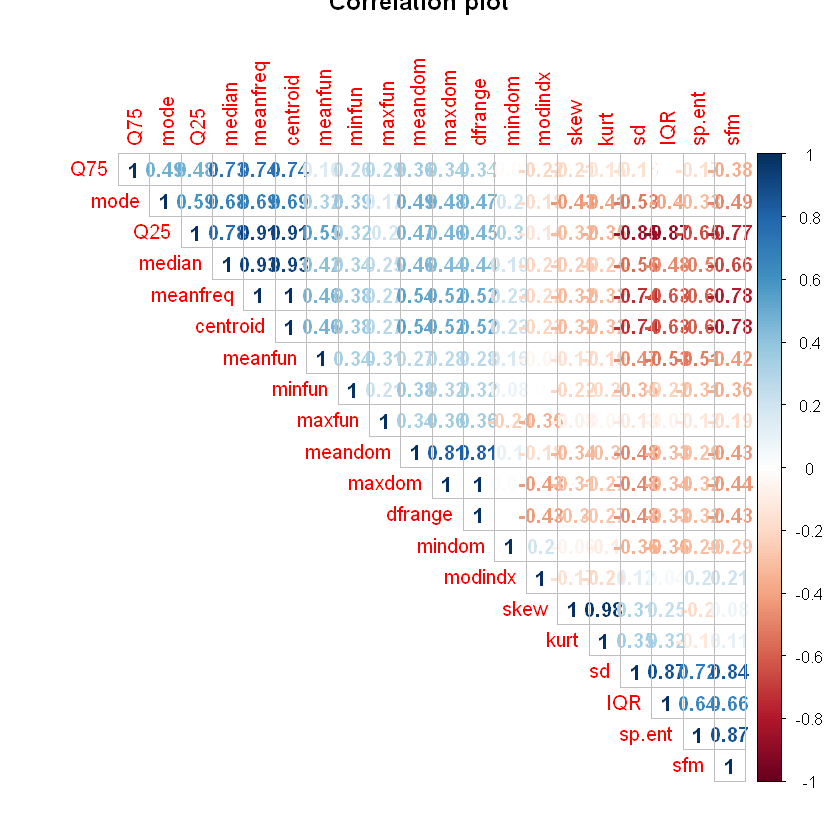

In [6]:
#check for correlation and dependency variables
ndata <- sapply(voice_data[,-21],as.numeric)# convert values to numeric
colnames(ndata)
cordata <- cor(ndata)
#findCorrelation(cordata ,names = TRUE) #find correlation
#findCorrelation(cor(ndata),cutoff = 0.80,verbose = FALSE,names = TRUE) #find correlation with cor value greater than threshold
findCorrelation(cordata,cutoff = 0.70,verbose = FALSE,names = TRUE) #find correlation with cor value greater than threshold
#there are few variables that are correlated
#find dependency that contains vectors of column numbers
findLinearCombos(ndata)
dim(ndata)
corrplot(cordata,title = "Correlation plot", type="upper",order="hclust",method="number")


* From the above corrplot, we can see that there is correlation between variables.
* Lets remove these variables 'meanfreq''centroid''Q25''sd''median''sfm''maxdom''dfrange''skew'
* We can also see linear dependency between features. It is better to remove these variables as suggested.
* IQR, centroid, dfrange

In [7]:
voice_data1 <- voice_data[,!names(voice_data) %in% c('meanfreq','centroid','Q25','sd','median','sfm','maxdom','dfrange','skew','IQR' )]
str(voice_data1)#new dataset
names(voice_data1) #column names of new dataset

'data.frame':	3166 obs. of  11 variables:
 $ Q75    : num  0.0902 0.0927 0.1319 0.208 0.206 ...
 $ kurt   : num  274.4 634.61 1024.93 4.18 4.33 ...
 $ sp.ent : num  0.893 0.892 0.846 0.963 0.972 ...
 $ mode   : num  0 0 0 0.0839 0.1043 ...
 $ meanfun: num  0.0843 0.1079 0.0987 0.089 0.1064 ...
 $ minfun : num  0.0157 0.0158 0.0157 0.0178 0.0169 ...
 $ maxfun : num  0.276 0.25 0.271 0.25 0.267 ...
 $ meandom: num  0.00781 0.00901 0.00799 0.2015 0.71281 ...
 $ mindom : num  0.00781 0.00781 0.00781 0.00781 0.00781 ...
 $ modindx: num  0 0.0526 0.0465 0.2471 0.2083 ...
 $ label  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...


[1] "Q75"     "kurt"    "sp.ent"  "mode"    "meanfun" "minfun"  "maxfun" 
 [8] "meandom" "mindom"  "modindx" "label"

After removing dependent variables, we got 10 feature variables

[1] "Q75 :  length of outliers  : 27"


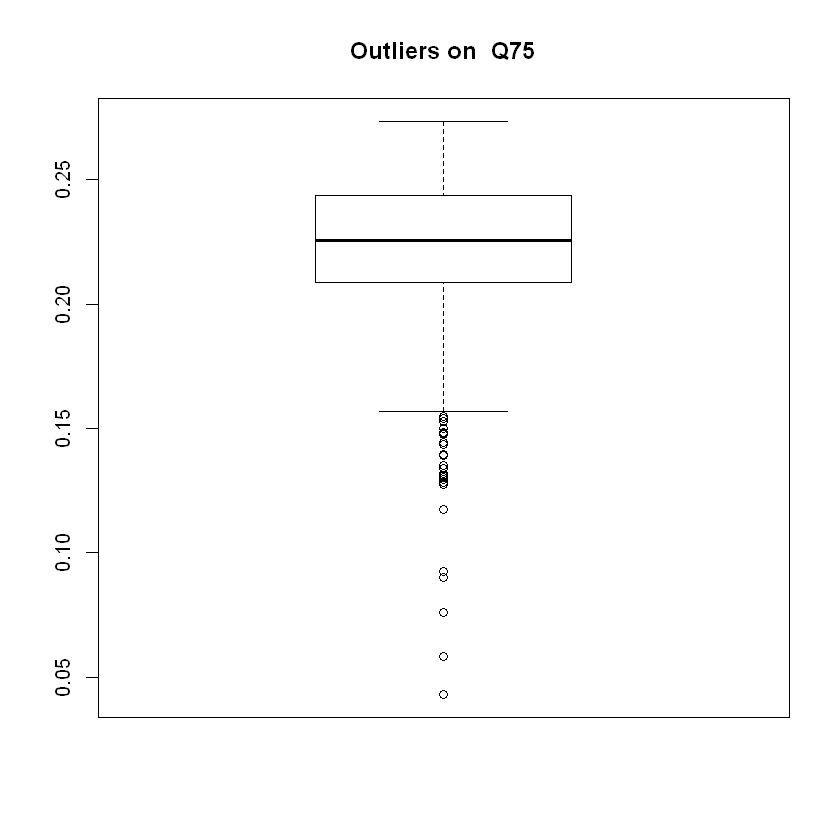

[1] "kurt :  length of outliers  : 321"


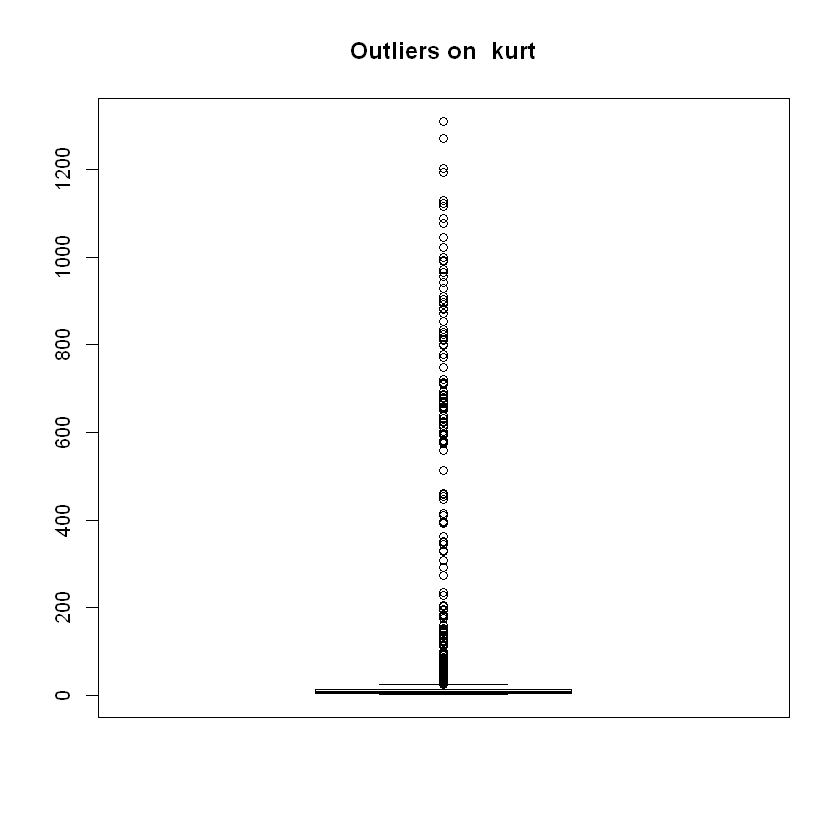

[1] "sp.ent :  length of outliers  : 1"


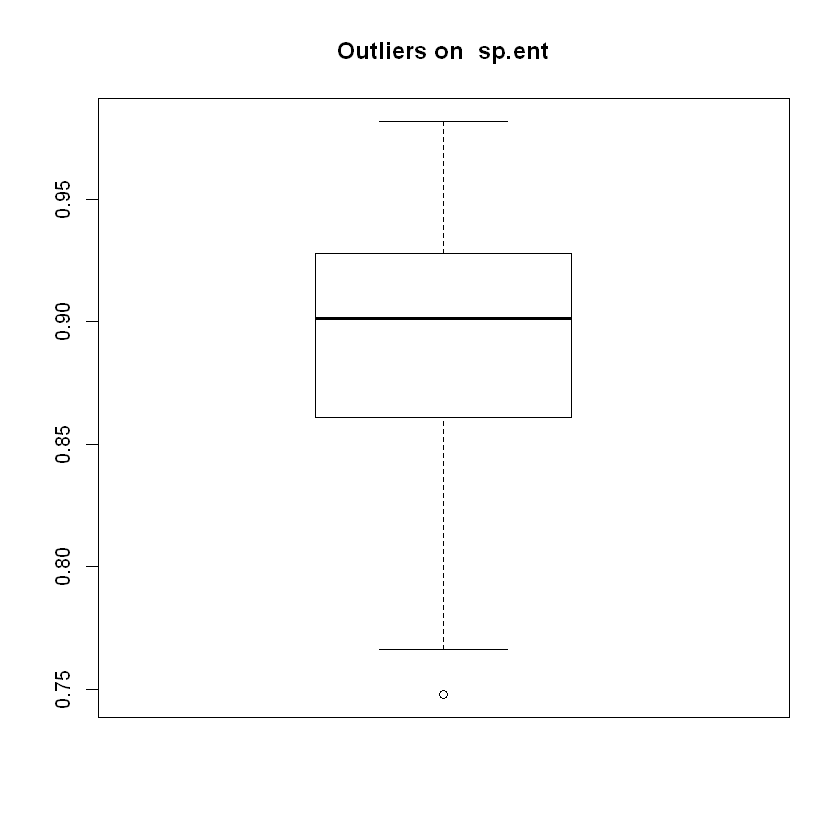

[1] "mode :  length of outliers  : 146"


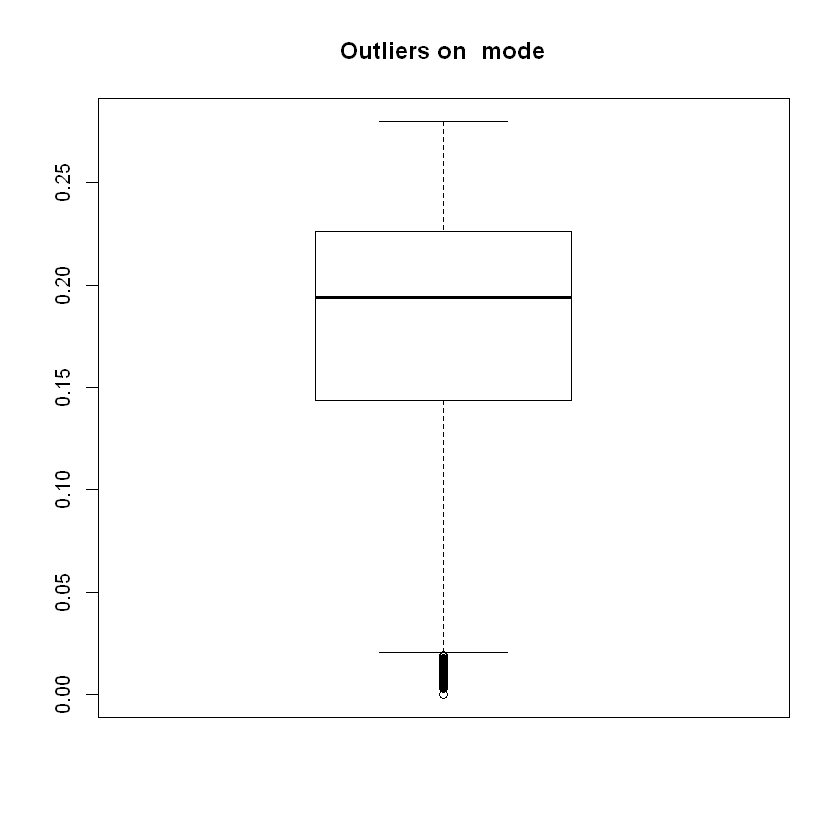

[1] "meanfun :  length of outliers  : 0"


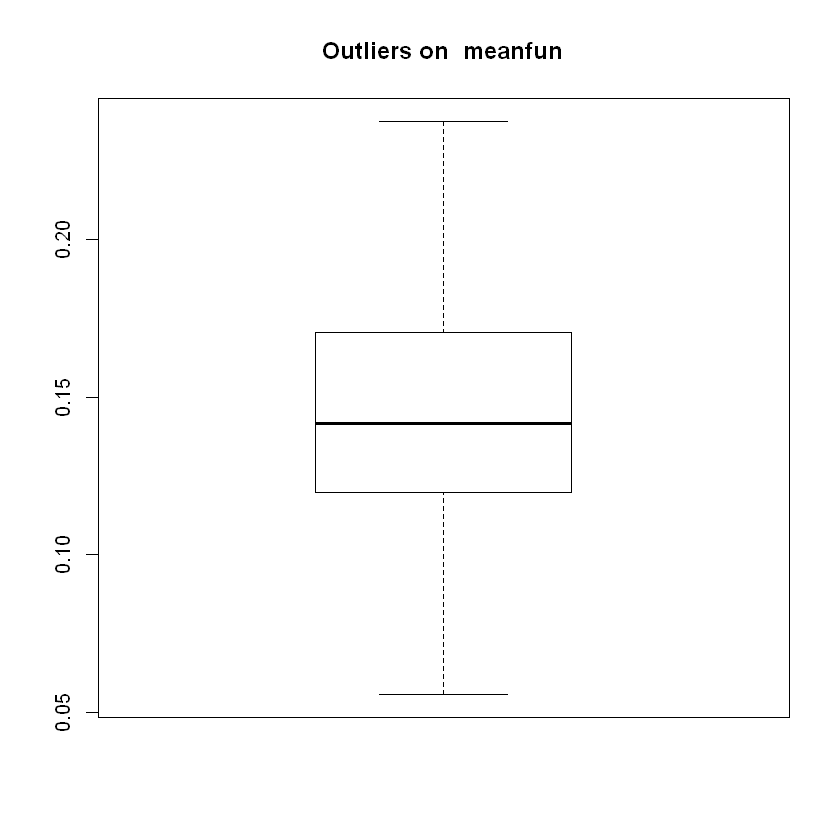

[1] "minfun :  length of outliers  : 38"


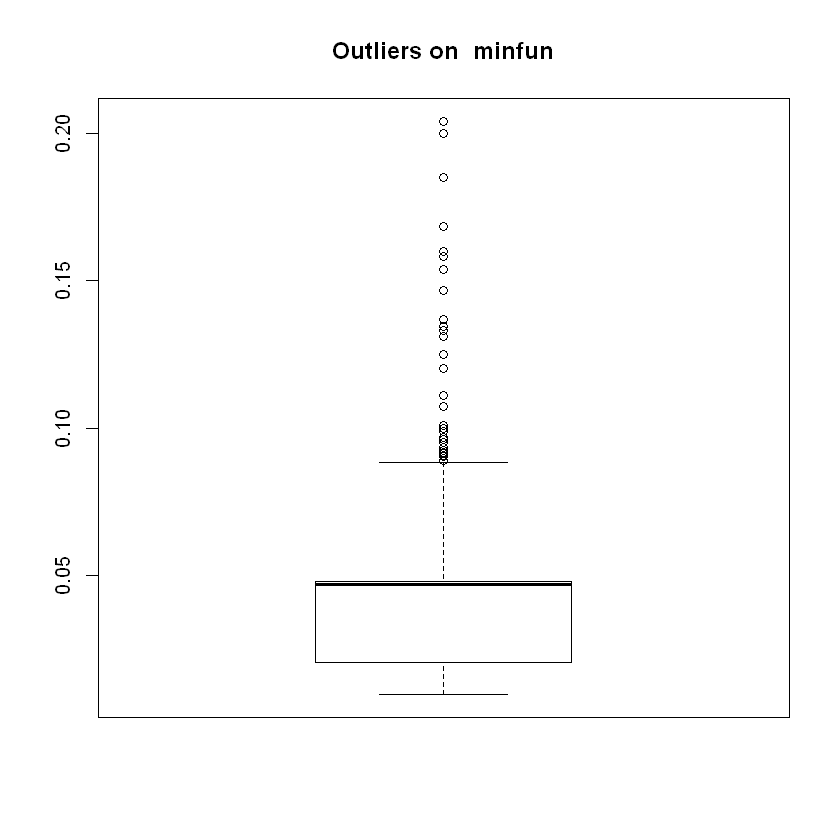

[1] "maxfun :  length of outliers  : 281"


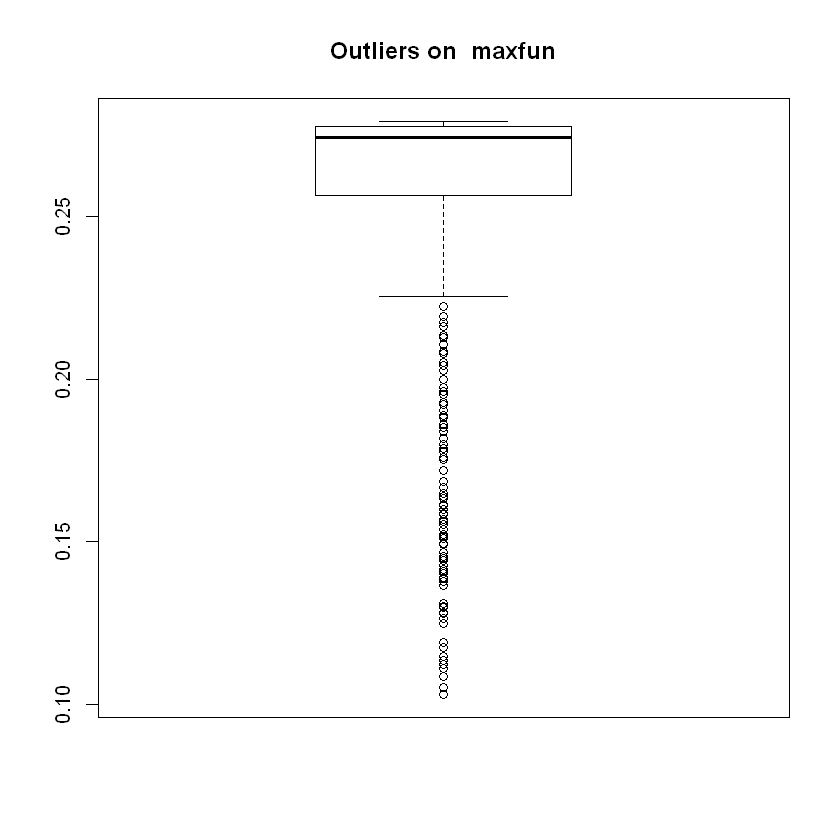

[1] "meandom :  length of outliers  : 19"


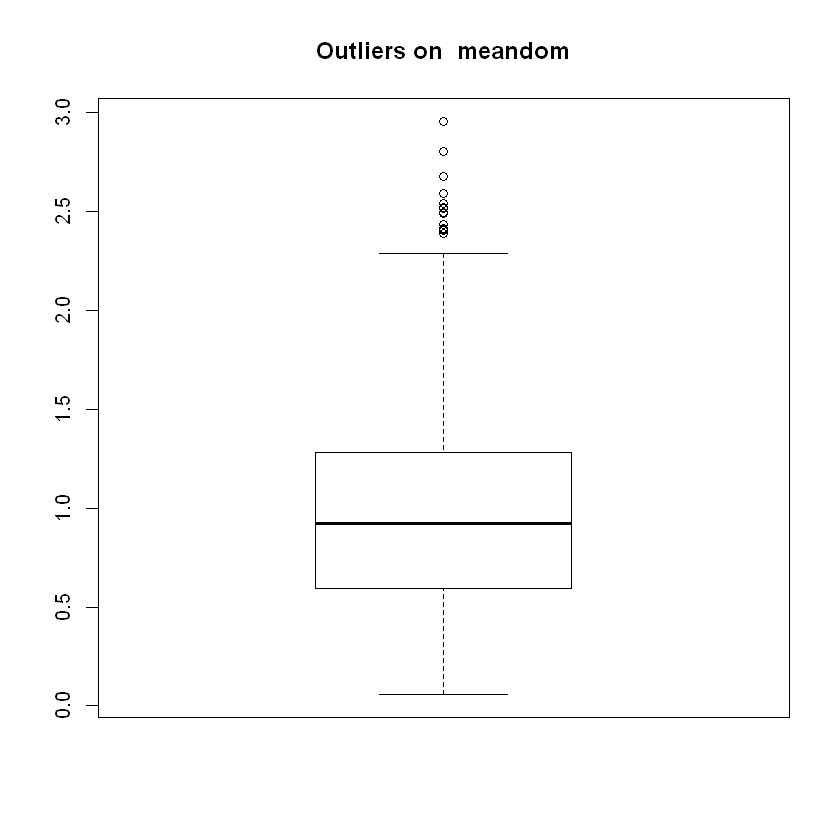

[1] "mindom :  length of outliers  : 488"


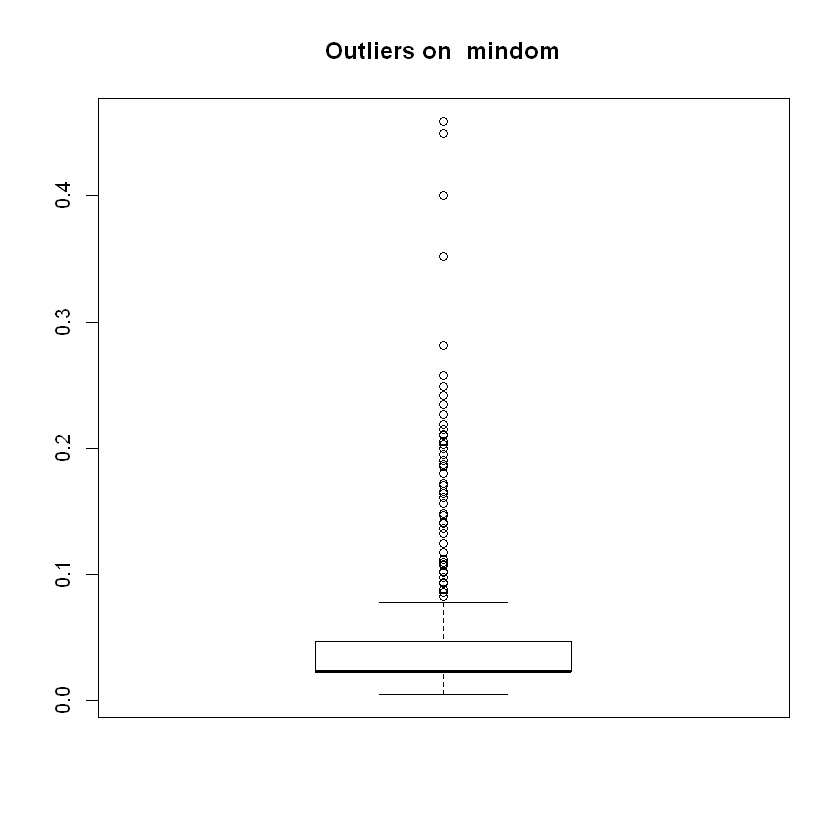

[1] "modindx :  length of outliers  : 137"
'data.frame':	1708 obs. of  11 variables:
 $ Q75    : num  0.208 0.206 0.21 0.206 0.209 ...
 $ kurt   : num  4.18 4.33 8.31 5.99 4.07 ...
 $ sp.ent : num  0.963 0.972 0.963 0.968 0.971 ...
 $ mode   : num  0.0839 0.1043 0.1126 0.0862 0.2191 ...
 $ meanfun: num  0.089 0.1064 0.1101 0.1059 0.0967 ...
 $ minfun : num  0.0178 0.0169 0.0171 0.0262 0.018 ...
 $ maxfun : num  0.25 0.267 0.254 0.267 0.25 ...
 $ meandom: num  0.201 0.713 0.298 0.48 0.336 ...
 $ mindom : num  0.00781 0.00781 0.00781 0.00781 0.00781 ...
 $ modindx: num  0.247 0.208 0.125 0.124 0.148 ...
 $ label  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
[1] "Variables with outliers:  Q75"     "Variables with outliers:  kurt"   
[3] "Variables with outliers:  sp.ent"  "Variables with outliers:  mode"   
[5] "Variables with outliers:  minfun"  "Variables with outliers:  maxfun" 
[7] "Variables with outliers:  meandom" "Variables with outliers:  mindom" 
[9] "Variables with out

[1] "Q75"     "kurt"    "sp.ent"  "mode"    "meanfun" "minfun"  "maxfun" 
 [8] "meandom" "mindom"  "modindx" "label"

[1] 1708   11


  0   1 
867 841 

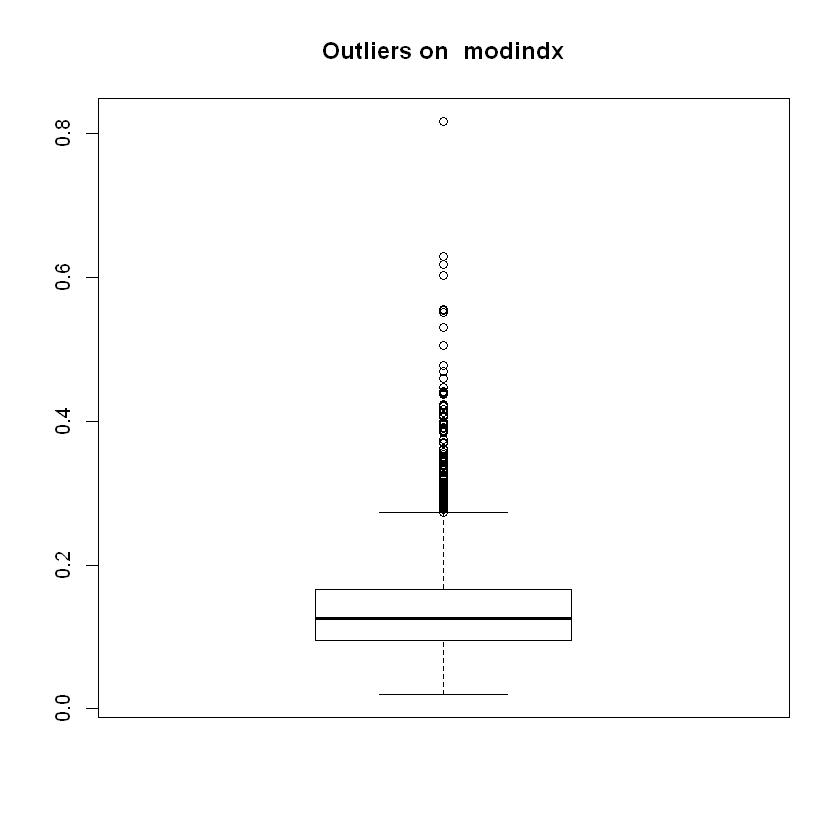

In [8]:
#check outliers only for double type
par(mfrow=c(2,2))
vector=c()
for(eachCol in names(voice_data1[,-11])){
    if(typeof(voice_data1[,eachCol]) %in% c("double")){ #check outliers only for num variables
        boxplot(voice_data1[,eachCol],main=paste("Outliers on ",eachCol)) # boxplot  of each numeric variable
        outliers <- boxplot(voice_data1[,eachCol],plot=FALSE)$out # find outliers
        print(paste(c(eachCol," length of outliers ",length(outliers)),collapse=' : ')) # description of number of outliers found
        #lets remove outliers now
        if(length(outliers)>0){
            voice_data1 <- voice_data1[-which(voice_data1[,eachCol] %in% outliers),]
             vector <- c(vector, eachCol)
        }
    }
}
str(voice_data1)
print(paste("Variables with outliers: ",vector))
#Verify if outliers are removed 
names(voice_data1)
dim(voice_data1)
table(voice_data1$label)


We can see that some of the records are removed 
* data.frame':	2171 obs. of  9 variables


        0         1 
0.5076112 0.4923888 

[1] "Q75 : -0.500433194399277"
[1] "kurt : 1.39203288080665"
[1] "kurt Log : 0.268676823269189"
[1] "sp.ent : -0.330824447304047"
[1] "mode : -0.759866962760219"
[1] "meanfun : 0.136755377433014"
[1] "minfun : -0.973742109699029"
[1] "maxfun : -2.23145990513064"


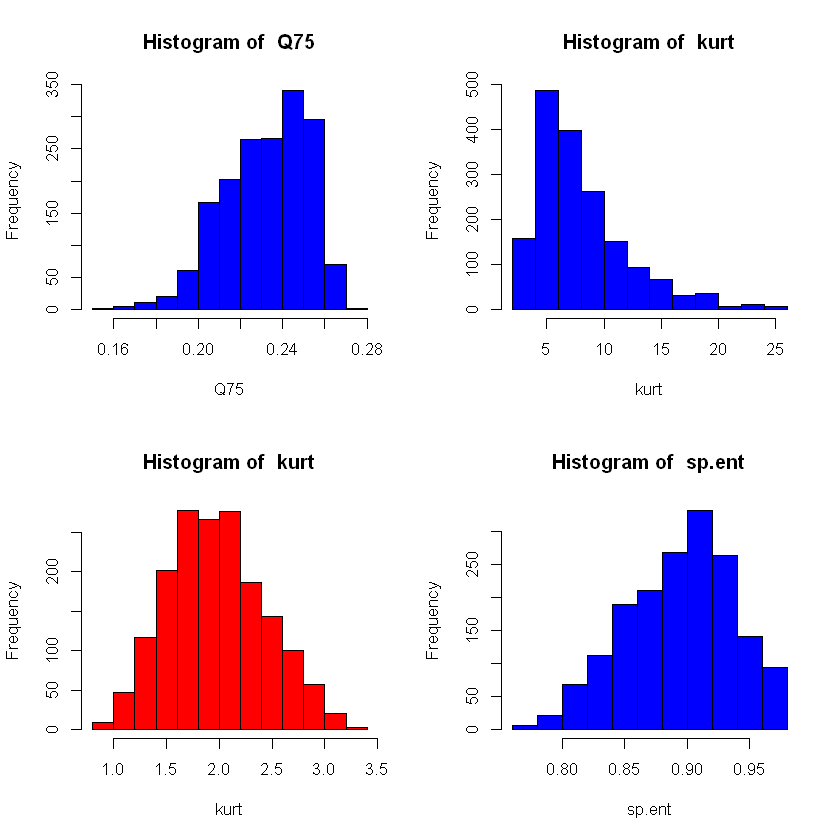

[1] "maxfun sq: -2.13127883888378"
[1] "meandom : 0.286979227406029"
[1] "mindom : 1.87039616483532"
[1] "mindom Log : -0.69177460773521"


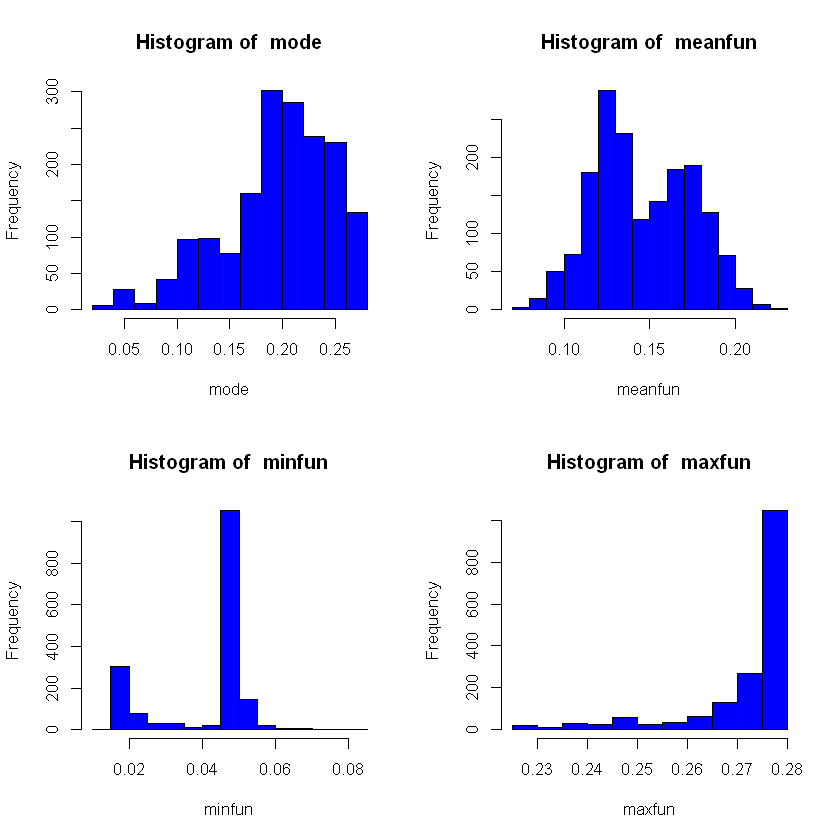

[1] "modindx : 0.736728958326897"


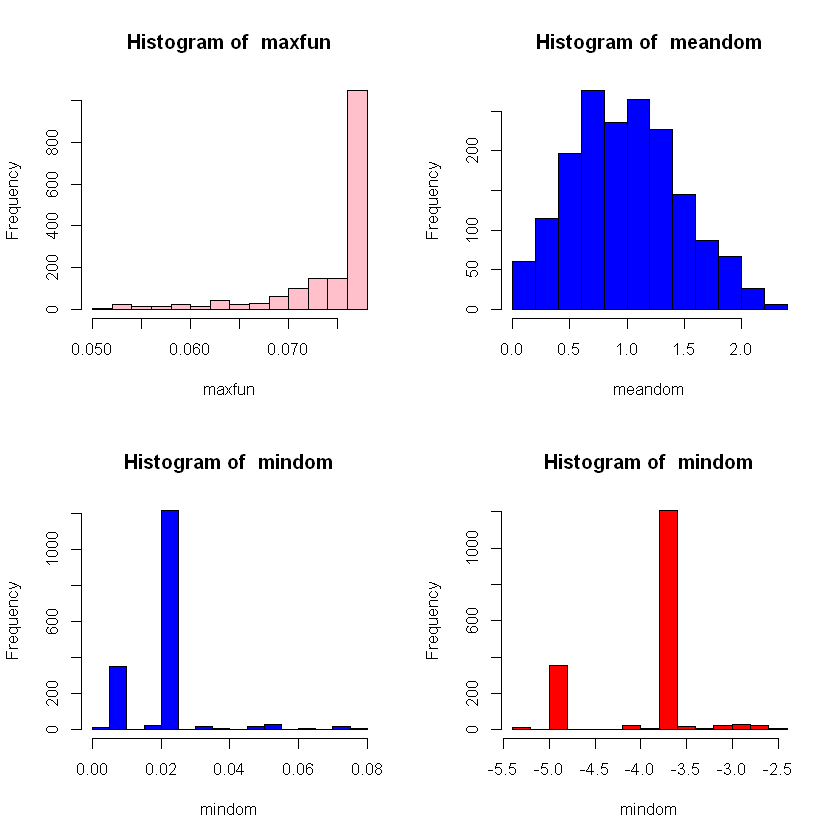

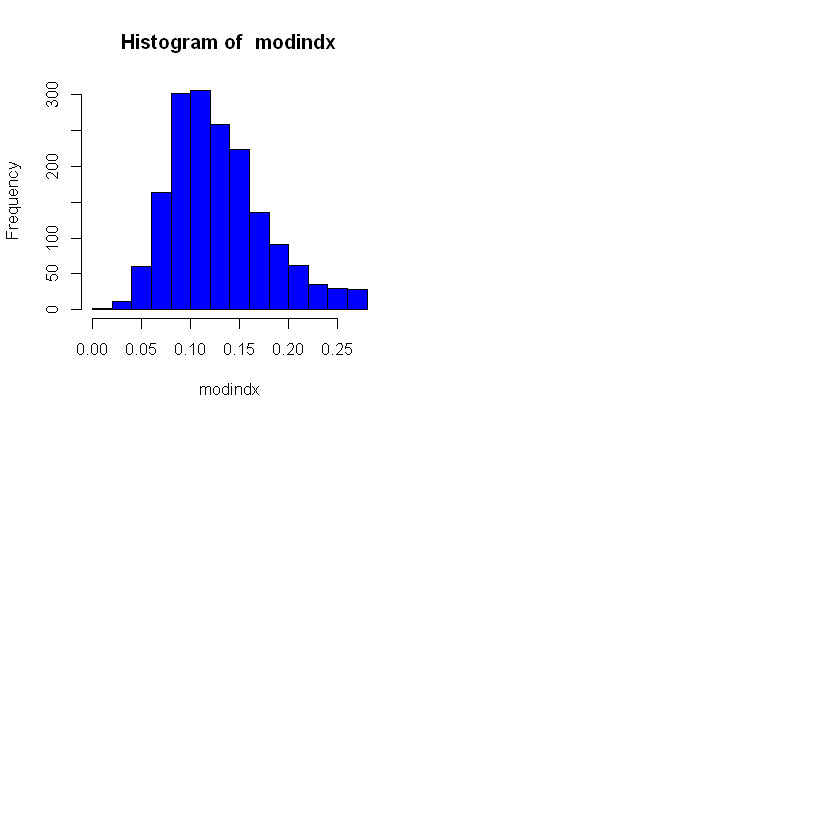

In [9]:
prop.table(table(voice_data1$label))
#Skewness-- apply skewness if there is any
par(mfrow=c(2,2))
for(eachCol in names(voice_data1[,-11])){
    if(typeof(voice_data1[,eachCol]) %in% c("double")){ #check outliers only for num variables
        sk1 <- skewness(voice_data1[,eachCol])
        print(paste(c(eachCol,sk1),collapse=" : "))
        hist(voice_data1[,eachCol] , col='blue', main=paste("Histogram of ",eachCol), xlab=eachCol)
        if(abs(sk1)>=1){
            k <- skewness(log(voice_data1[,eachCol]),type=2)
            if(abs(k)<1){
                print(paste(c(eachCol,k),collapse=" Log : "))
                voice_data1[,eachCol]=log(voice_data1[,eachCol])
                hist(voice_data1[,eachCol] , col='red', main=paste("Histogram of ",eachCol), xlab=eachCol)   
            }else {
                k1 <- skewness(sqrt(voice_data1[,eachCol]),type=2)
                if(abs(k1)<1){
                    print(paste(c(eachCol,k1),collapse=" sqrt: "))
                    voice_data1[,eachCol]=sqrt(voice_data1[,eachCol])
                    hist(voice_data1[,eachCol] , col='yellow', main=paste("Histogram of ",eachCol), xlab=eachCol) 
                }else{
                    k2 <- skewness((voice_data1[,eachCol])^1/3,type=2)
                    if(abs(k2)<1){
                        print(paste(c(eachCol,k2),collapse=" cb: "))
                        voice_data1[,eachCol]= (voice_data1[,eachCol])^1/3
                        hist(voice_data1[,eachCol] , col='green', main=paste("Histogram of ",eachCol), xlab=eachCol) 
                    }else{
                        k3 <- skewness((voice_data1[,eachCol])^2,type=2)
                        print(paste(c(eachCol,k3),collapse=" sq: "))
                        voice_data1[,eachCol]= (voice_data1[,eachCol])^2
                        hist(voice_data1[,eachCol] , col='pink', main=paste("Histogram of ",eachCol), xlab=eachCol)
                    }
                }
            }
        }
    }
}

* We can see dataset is mostly balanced

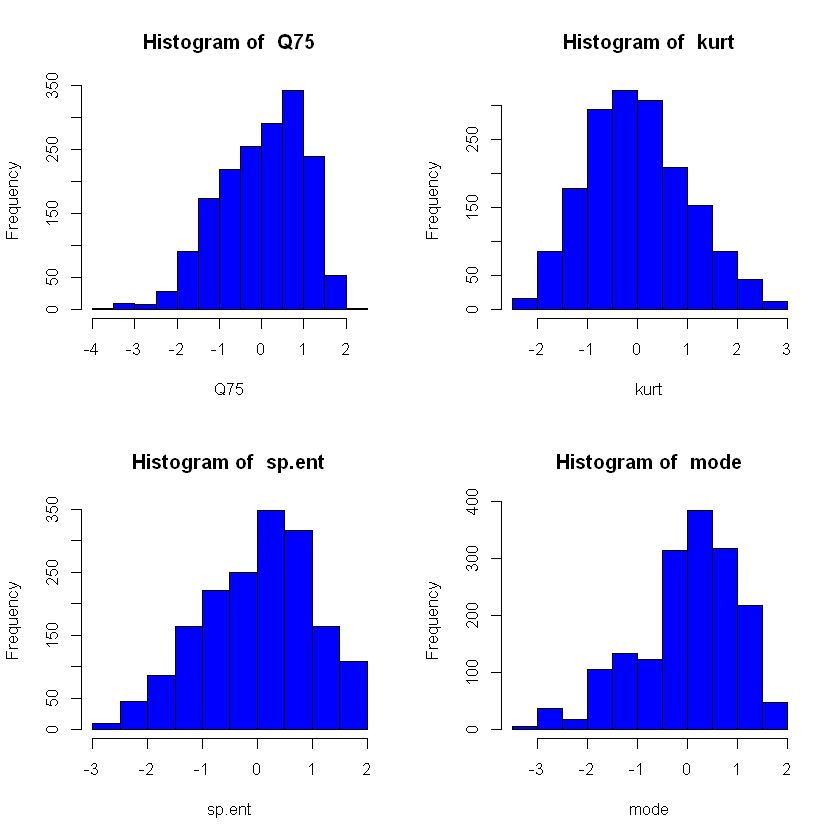

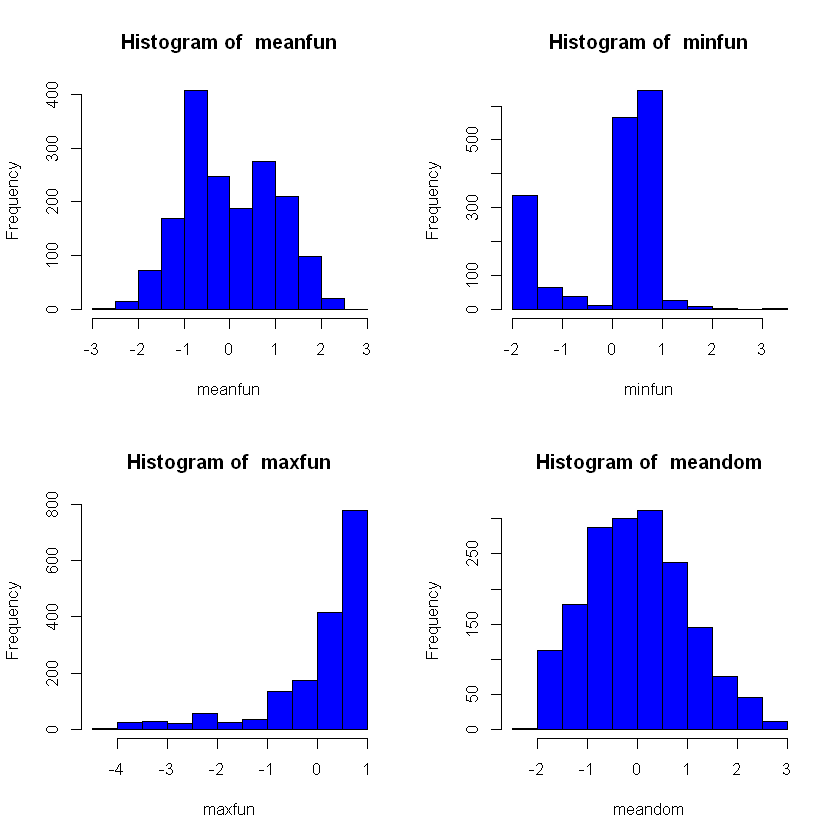

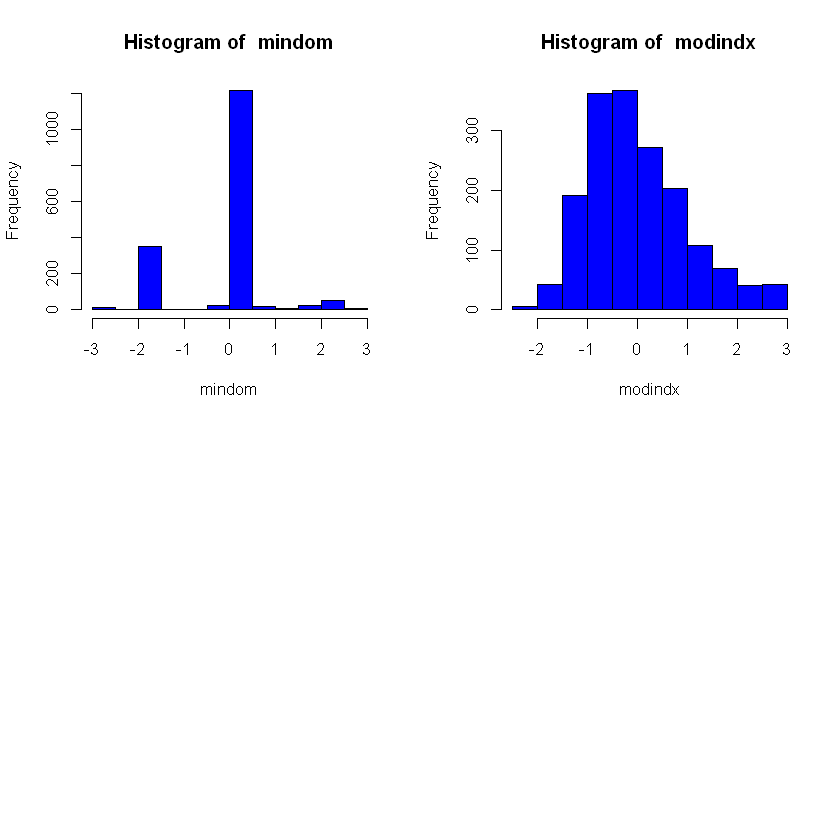

In [10]:
voice_data2 <- voice_data1
par(mfrow=c(2,2))
for(eachCol in names(voice_data2[,-11]) ){
    if(typeof(voice_data2[,eachCol]) %in% c("double")){
        voice_data2[,eachCol] <- scale(voice_data2[,eachCol])
        hist(voice_data2[,eachCol] , col='blue', main=paste("Histogram of ",eachCol), xlab=eachCol)
    } 
}

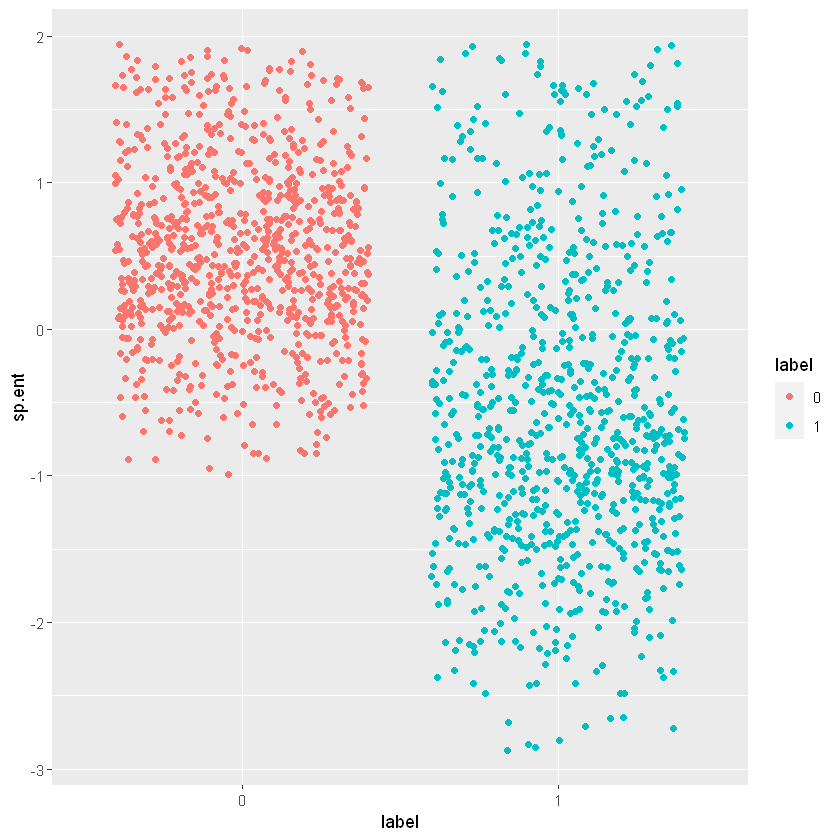

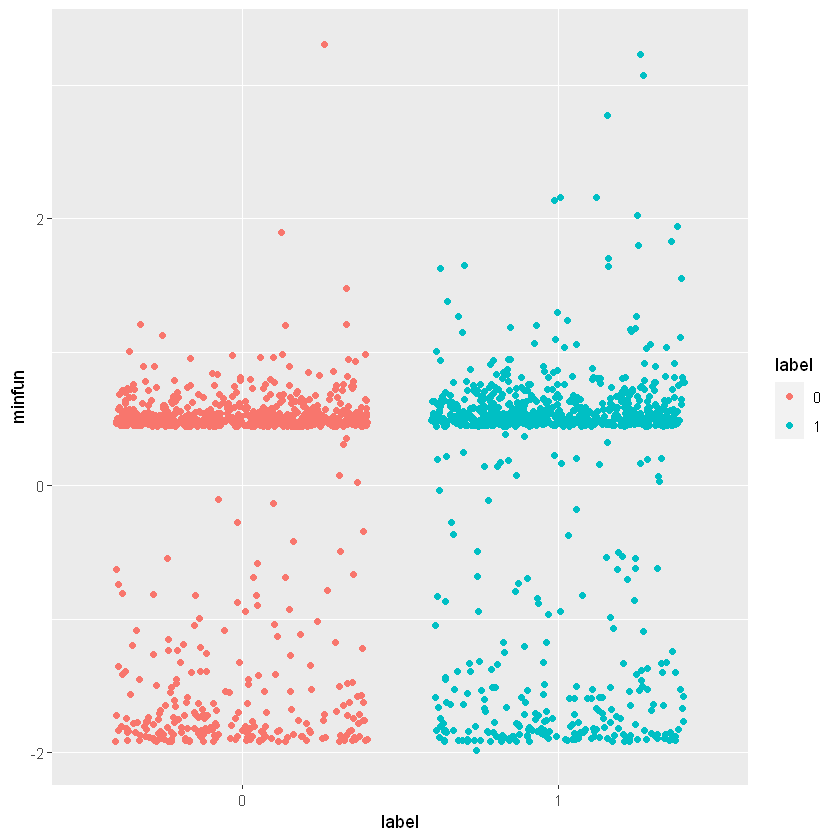

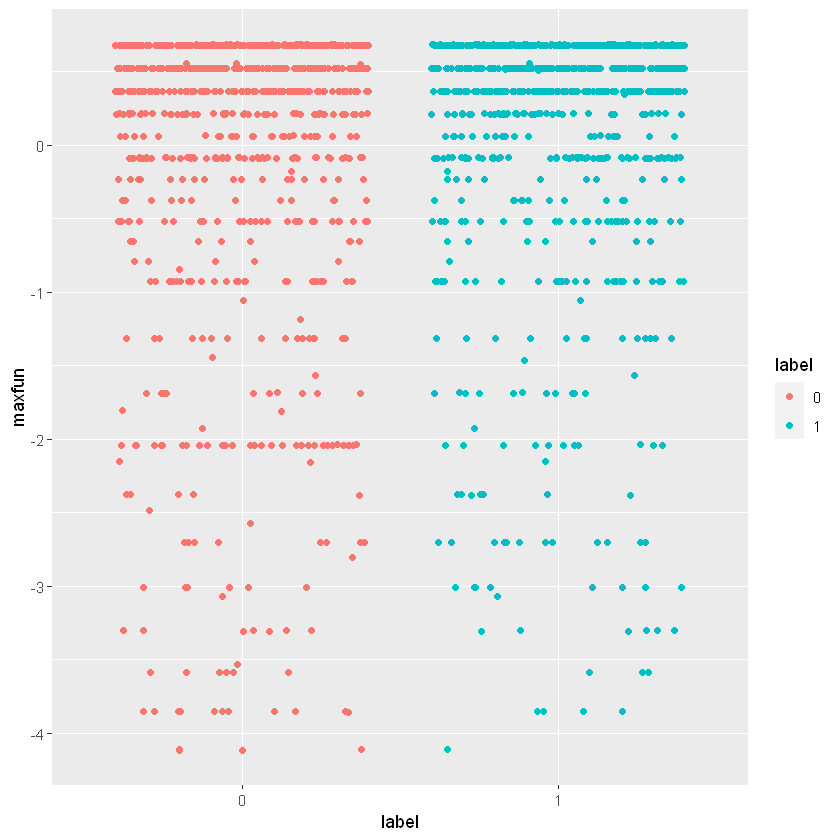

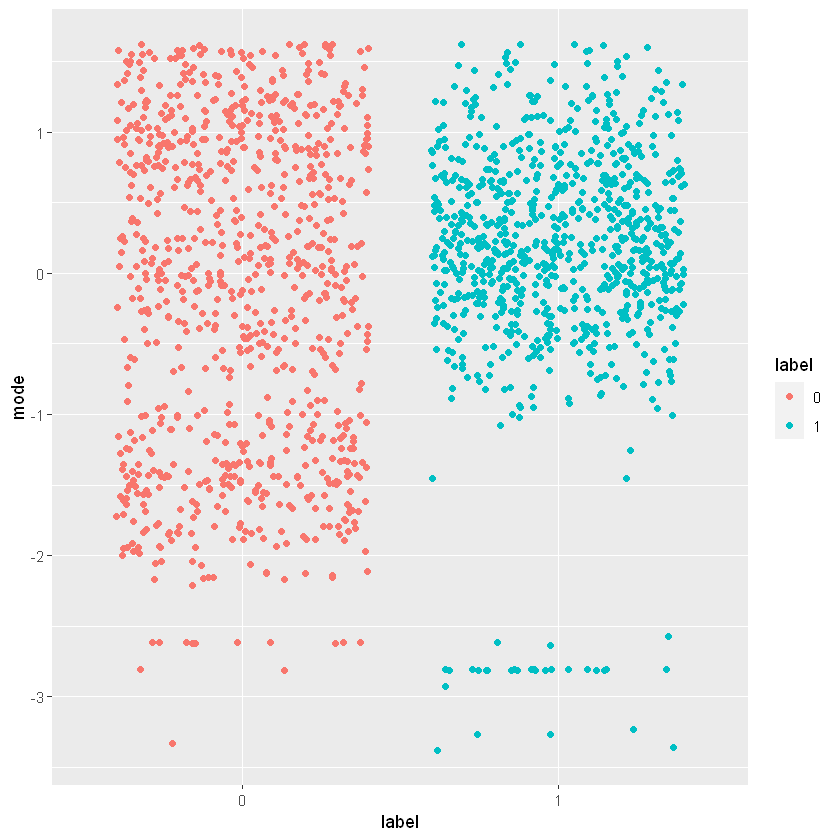

In [11]:
#plotting
par(mfrow=c(2,2))
ggplot(voice_data2, aes(x=label, y=sp.ent, color=label)) + geom_jitter()
ggplot(voice_data2, aes(x=label, y=minfun, color=label)) + geom_jitter()
ggplot(voice_data2, aes(x=label, y=maxfun, color=label)) + geom_jitter()
ggplot(voice_data2, aes(x=label, y=mode, color=label)) + geom_jitter()

The first graph on the top left is a jitter plot of the variable sp.ent with the label variable (male=0, female=1). The range with the male variable is a lot smaller than the female variable. The graph on the top right is showing the variable minfun with the label variable. There is not much of a difference between male/female, except for female there are a few more outliers. The graph on the bottom left shows the variable maxfun with the variable label. Both male/female are about the same, with minor differences. The last graph on the bottom right shows the variable mode with the variable label. These are very similar, except for the male side where there is more of a range for the mode, the female is more clustered together.

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     1.8896 1.2674 1.0305 0.94647 0.81833 0.77511 0.73252
Proportion of Variance 0.3571 0.1606 0.1062 0.08958 0.06697 0.06008 0.05366
Cumulative Proportion  0.3571 0.5177 0.6239 0.71346 0.78043 0.84051 0.89417
                           PC8     PC9   PC10
Standard deviation     0.68172 0.58701 0.4990
Proportion of Variance 0.04647 0.03446 0.0249
Cumulative Proportion  0.94064 0.97510 1.0000

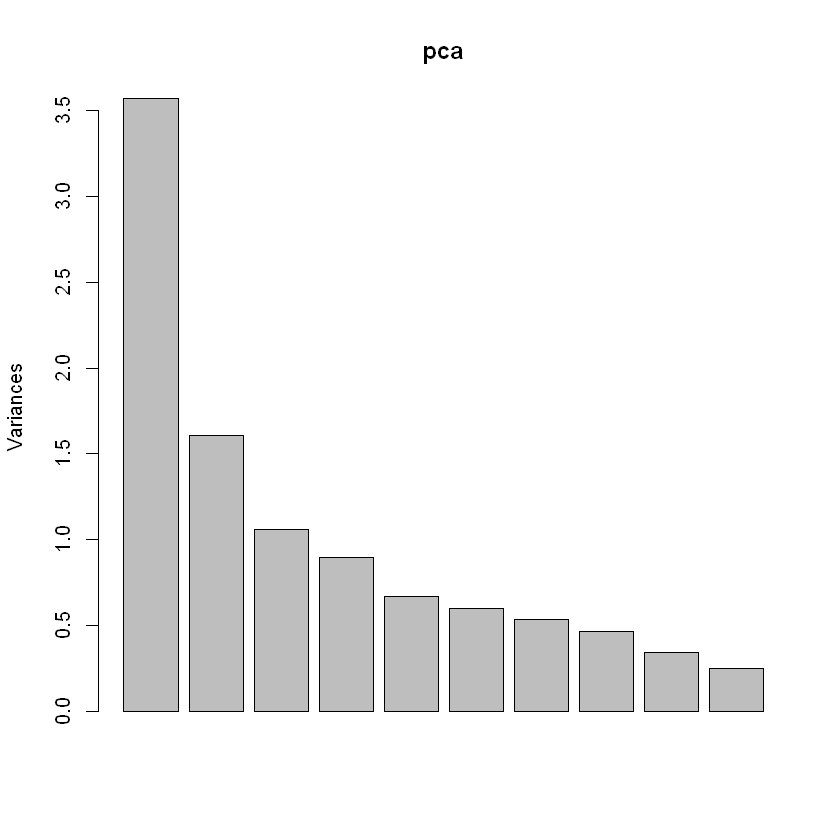

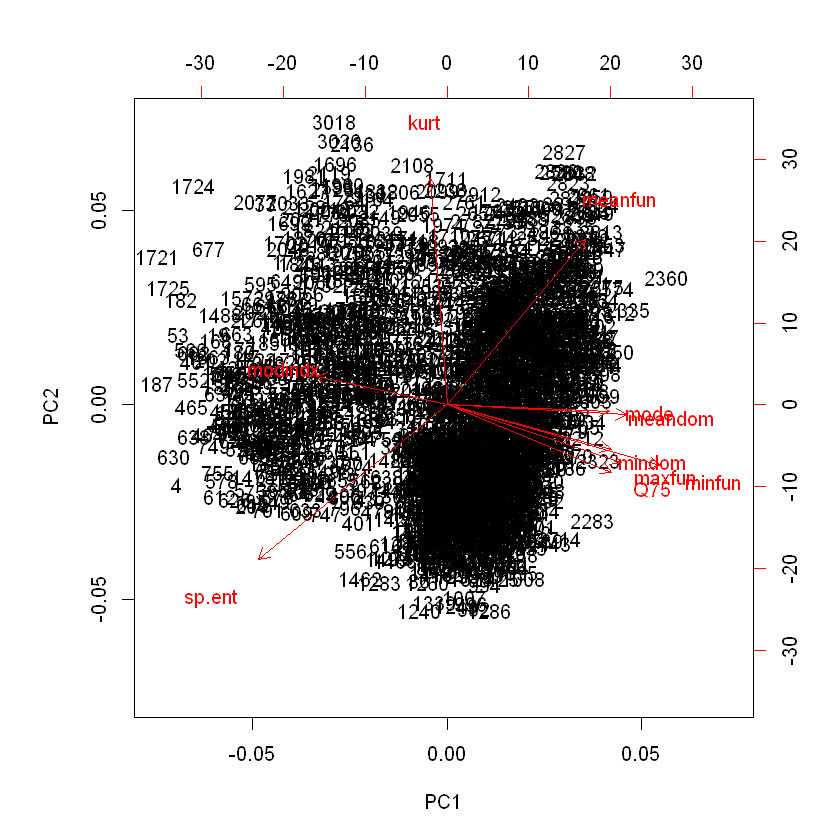

In [12]:
pca <- prcomp(voice_data1[,-11],scale=TRUE)
summary(pca)
plot(pca)
biplot(pca)

From PCA, we can infer that only three variables should be considered by looking at the scree plot or eigen values.
From the biplot, we can see that number of variables can be reduced. Let us recheck using EFA as a variable reduction mechanism.

In [14]:
nScree(voice_data1[,-11])
eigen(cor(voice_data1[,-11]))

Installing package into 'C:/Users/gnavy/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'nFactors' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\gnavy\AppData\Local\Temp\RtmpKEEmKT\downloaded_packages


Warning message:
"package 'nFactors' was built under R version 3.6.3"
Attaching package: 'nFactors'

The following object is masked from 'package:lattice':

    parallel



  noc naf nparallel nkaiser
1   3   1         3       3

eigen() decomposition
$values
 [1] 3.5706558 1.6063170 1.0618416 0.8958016 0.6696596 0.6007923 0.5365928
 [8] 0.4647479 0.3445774 0.2490139

$vectors
            [,1]        [,2]         [,3]        [,4]        [,5]         [,6]
 [1,]  0.3220933 -0.19670586 -0.483325039 -0.06362834 -0.23270192  0.416411057
 [2,] -0.0332232  0.66286585  0.235149036 -0.06460885 -0.03294419  0.109316554
 [3,] -0.3689219 -0.45025379 -0.003689815  0.04327063  0.13965052 -0.007202879
 [4,]  0.3187417 -0.01816462 -0.557013390 -0.21089144 -0.03089620 -0.347441878
 [5,]  0.2705288  0.48356321 -0.229743815  0.07101554  0.13779036  0.104989869
 [6,]  0.4175011 -0.17786734  0.219470764  0.08247638  0.05311915 -0.218820316
 [7,]  0.3419652 -0.16816443  0.199777861 -0.06573170  0.61209945  0.565736003
 [8,]  0.3519787 -0.02917413  0.108816860  0.52015847  0.26807231 -0.455376059
 [9,]  0.3214136 -0.13094031  0.352207046  0.26235610 -0.67381124  0.218296690
[10,] -0.2565610  0.08432852 -0.352239355  0.76802852  0.044

In [15]:
# Now let us obtain the 3-factor solution
factanal(voice_data1[,-11], factors=3)


Call:
factanal(x = voice_data1[, -11], factors = 3)

Uniquenesses:
    Q75    kurt  sp.ent    mode meanfun  minfun  maxfun meandom  mindom modindx 
  0.215   0.605   0.012   0.665   0.619   0.178   0.658   0.620   0.671   0.802 

Loadings:
        Factor1 Factor2 Factor3
Q75      0.236           0.854 
kurt    -0.154   0.555  -0.251 
sp.ent  -0.381  -0.880  -0.264 
mode     0.297   0.130   0.480 
meanfun  0.206   0.554   0.179 
minfun   0.889           0.177 
maxfun   0.534           0.239 
meandom  0.571   0.156   0.174 
mindom   0.541           0.167 
modindx -0.414  -0.130         

               Factor1 Factor2 Factor3
SS loadings      2.220   1.455   1.281
Proportion Var   0.222   0.145   0.128
Cumulative Var   0.222   0.368   0.496

Test of the hypothesis that 3 factors are sufficient.
The chi square statistic is 263.87 on 18 degrees of freedom.
The p-value is 1.22e-45 

Factor1 - minfun, maxfun, meandom, mindom - lets keep it as minfun.
Factor2 - kurt, sp.ent, meanfun lets keep it as sp.ent
Factor3 - Q75.
This three factor analysis explains 49.6% about the variables.
minfun, sp.ent and Q75 as three main factors to consider.

### Methodology
After Data preparation and data cleaning, let us train models and check for accuracy.
I have choosed some best models and by the end of the evaluation, we will pick model with high accuracy
* Logistic Regression 
* CART
* C5.0
* Single Neural Network
* Random forest - tuned model (Ensemble method)
* SVM - tuned model
* Stacked ensemble model (Note: Due to library dependency, this didnt work. But this working example from local)
1. Explanation your methodology



2. Introduce the predictive models you used in your project
 * Model 1
    * Logistic- using all the selected variables, strong variables
 
 * Model 2
    * C5.0 - using all variables, strong variables
  * Model 3
    * Artificial Neural Network
 * Model 4
    * CART - using all variables, strong variables
* Model 5
    * SVM - using all variables
   
 * Ensemble method
     * Random Forest
     * Stacking - 'rpart', 'glm', 'knn','svmRadial','C5.0'	

In [16]:
#Partitioning dataset 80:20
set.seed(663)
voicedata_sampling_vector <- createDataPartition(voice_data1$label, p = 0.80, list = FALSE)
voicedata_train <- voice_data1[voicedata_sampling_vector,] # train dataset
voicedata_train_labels <- voice_data1$label[voicedata_sampling_vector] #train label
voicedata_test <- voice_data1[-voicedata_sampling_vector,] #test dataset
voicedata_test_labels <- voice_data1$label[-voicedata_sampling_vector] # test label
table(voicedata_train_labels) #check balance
table(voicedata_test_labels) # check balance

voicedata_train_labels
  0   1 
694 673 

voicedata_test_labels
  0   1 
173 168 

In [17]:
#Save predictions results in this matrix - This is a function to calculate accuracy, precision, recall and f1
result_matrix <- data.frame( train_accuracy=double(0.00),accuracy=double(0.00),precision=double(0.00), recall=double(0.00) ,f1=double(0.00), row.names=NULL)
classificationResult <- function(target_test,target_train,test_predictions,train_predictions,rname,result_matrix){
    train_mean <- mean(train_predictions==target_train) #Test accuracy
    test_mean <- mean(test_predictions==target_test) #Train accuracy
    confusion_matrix <- table(predicted =test_predictions, actual = target_test) #confusion matrix
    precision <- confusion_matrix[2, 2] / sum(confusion_matrix[2,]) # calculate precision
    recall <- confusion_matrix[2, 2] / sum(confusion_matrix[,2]) #calculate recall
    f = 2 * precision * recall / (precision + recall) # calculate f score
    ##Append results to matrix
    rm1 <- data.frame(train_accuracy=c(train_mean),accuracy=c(test_mean),precision=c(precision),recall=c(recall),f1=c(f)) # insert row
    rownames(rm1) <- rname # assign row name
    result_matrix <- rbind(result_matrix, rm1) # bind with dataframe
    result_matrix
}

Our test and train dataset is mostly trained on classifier 0.

In [18]:
#model 1 - Logistic models 
#with all variables
model1 <- glm(label~.,data=voicedata_train,family=binomial("logit"),maxit=100) # fitting model
summary(model1) # summary of fit model

#make predictions
train_predictions <- predict(model1,newdata=voicedata_train,type='response')
train_class_predictions.1 <- as.numeric(train_predictions>0.5) # train predictions

#make predictions on test data
test_predictions <-predict(model1,newdata=voicedata_test,type='response')
test_class_predictions.1 <- as.numeric(test_predictions>0.5) #test predictions

result_matrix <- classificationResult(voicedata_test$label,voicedata_train$label,test_class_predictions.1,train_class_predictions.1,"Logit-All Variables",result_matrix)
#model2 0 Logistic model with strong variables determined from the above model
#with Q75,sp.ent, meanfun, minfun
model2 <- glm(label~Q75 + sp.ent + meanfun + minfun,data=voicedata_train,family=binomial("logit"),maxit=100) #logistic model
summary(model2) # summary

#make predictions
train_predictions <- predict(model2,newdata=voicedata_train,type='response')
train_class_predictions.2 <- as.numeric(train_predictions>0.5) #train prediction

#make predictions on test data
test_predictions <-predict(model2,newdata=voicedata_test,type='response')
test_class_predictions.2 <- as.numeric(test_predictions>0.5)

result_matrix <- classificationResult(voicedata_test$label,voicedata_train$label,test_class_predictions.2,train_class_predictions.2,"Logit-with strong var",result_matrix)

#Model 3 Logistic model with strong variables after variable reduction
model3 <- glm(label~ minfun + sp.ent + Q75,data=voicedata_train,family=binomial("logit"),maxit=100) #logistic model
summary(model3) # summary

#make predictions
train_predictions <- predict(model3,newdata=voicedata_train,type='response')
train_class_predictions.2 <- as.numeric(train_predictions>0.5) #train prediction

#make predictions on test data
test_predictions <-predict(model3,newdata=voicedata_test,type='response')
test_class_predictions.2 <- as.numeric(test_predictions>0.5)

result_matrix <- classificationResult(voicedata_test$label,voicedata_train$label,test_class_predictions.2,train_class_predictions.2,"Logit-variable reduction",result_matrix)
result_matrix #appended with results of model3


Call:
glm(formula = label ~ ., family = binomial("logit"), data = voicedata_train, 
    maxit = 100)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.2079  -0.1369  -0.0071   0.0419   3.5914  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   31.8973     9.3100   3.426 0.000612 ***
Q75          -50.4359    10.2649  -4.913 8.95e-07 ***
kurt          -0.5954     0.4077  -1.460 0.144233    
sp.ent       -47.5971     8.0298  -5.928 3.07e-09 ***
mode          -4.6692     3.5408  -1.319 0.187280    
meanfun      201.2270    15.5019  12.981  < 2e-16 ***
minfun      -116.4004    17.9099  -6.499 8.07e-11 ***
maxfun        16.2805    37.0868   0.439 0.660673    
meandom        0.6285     0.4497   1.397 0.162289    
mindom         0.1594     0.3884   0.410 0.681565    
modindx       -2.3776     3.8351  -0.620 0.535284    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be


Call:
glm(formula = label ~ Q75 + sp.ent + meanfun + minfun, family = binomial("logit"), 
    data = voicedata_train, maxit = 100)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.2186  -0.1396  -0.0090   0.0424   3.2793  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   27.373      7.798   3.510 0.000447 ***
Q75          -49.368      9.082  -5.436 5.46e-08 ***
sp.ent       -44.768      7.277  -6.152 7.65e-10 ***
meanfun      199.097     14.984  13.288  < 2e-16 ***
minfun       -94.235     14.568  -6.469 9.89e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1894.74  on 1366  degrees of freedom
Residual deviance:  288.36  on 1362  degrees of freedom
AIC: 298.36

Number of Fisher Scoring iterations: 8



Call:
glm(formula = label ~ minfun + sp.ent + Q75, family = binomial("logit"), 
    data = voicedata_train, maxit = 100)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1932  -0.7769  -0.2849   0.6573   2.9142  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   55.108      3.126  17.627  < 2e-16 ***
minfun       -42.754      6.177  -6.921 4.47e-12 ***
sp.ent       -50.485      2.783 -18.139  < 2e-16 ***
Q75          -35.018      4.200  -8.337  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1894.7  on 1366  degrees of freedom
Residual deviance: 1272.1  on 1363  degrees of freedom
AIC: 1280.1

Number of Fisher Scoring iterations: 5


,train_accuracy,accuracy,precision,recall,f1
Logit-All Variables,0.9743965,0.9736070,0.9877301,0.9583333,0.9728097
Logit-with strong var,0.9685443,0.9589443,0.9695122,0.9464286,0.9578313
Logit-variable reduction,0.8076079,0.8416422,0.9014085,0.7619048,0.8258065


Model evaluation of logistic regression:
* High accuracy when all the 11 features are considered.
* Model 1 has more accuracy than all the other models.
* Model3 has more AIC which is relative- Feature selection 


Call:
C5.0.formula(formula = label ~ ., data = voicedata_train)


C5.0 [Release 2.07 GPL Edition]  	Mon Jun 08 16:39:57 2020
-------------------------------

Class specified by attribute `outcome'

Read 1367 cases (11 attributes) from undefined.data

Decision tree:

meanfun > 0.1435452:
:...meanfun > 0.1479629: 1 (618/5)
:   meanfun <= 0.1479629:
:   :...mode > 0.2311152: 0 (11/1)
:       mode <= 0.2311152:
:       :...minfun <= 0.04819277: 1 (24)
:           minfun > 0.04819277:
:           :...sp.ent <= 0.874889: 1 (2)
:               sp.ent > 0.874889: 0 (6)
meanfun <= 0.1435452:
:...minfun <= 0.01634321:
    :...meanfun > 0.1248939: 1 (11/4)
    :   meanfun <= 0.1248939:
    :   :...Q75 <= 0.1717913: 1 (3)
    :       Q75 > 0.1717913: 0 (40/1)
    minfun > 0.01634321:
    :...meanfun <= 0.1341661: 0 (531/1)
        meanfun > 0.1341661:
        :...Q75 <= 0.2101365: 1 (12/1)
            Q75 > 0.2101365:
            :...maxfun <= 0.07271809:
                :...mode <= 0.1857201: 1 

,train_accuracy,accuracy,precision,recall,f1
Logit-All Variables,0.9743965,0.9736070,0.9877301,0.9583333,0.9728097
Logit-with strong var,0.9685443,0.9589443,0.9695122,0.9464286,0.9578313
Logit-variable reduction,0.8076079,0.8416422,0.9014085,0.7619048,0.8258065
C5.0-All Variables,0.9882955,0.9589443,0.9638554,0.9523810,0.9580838


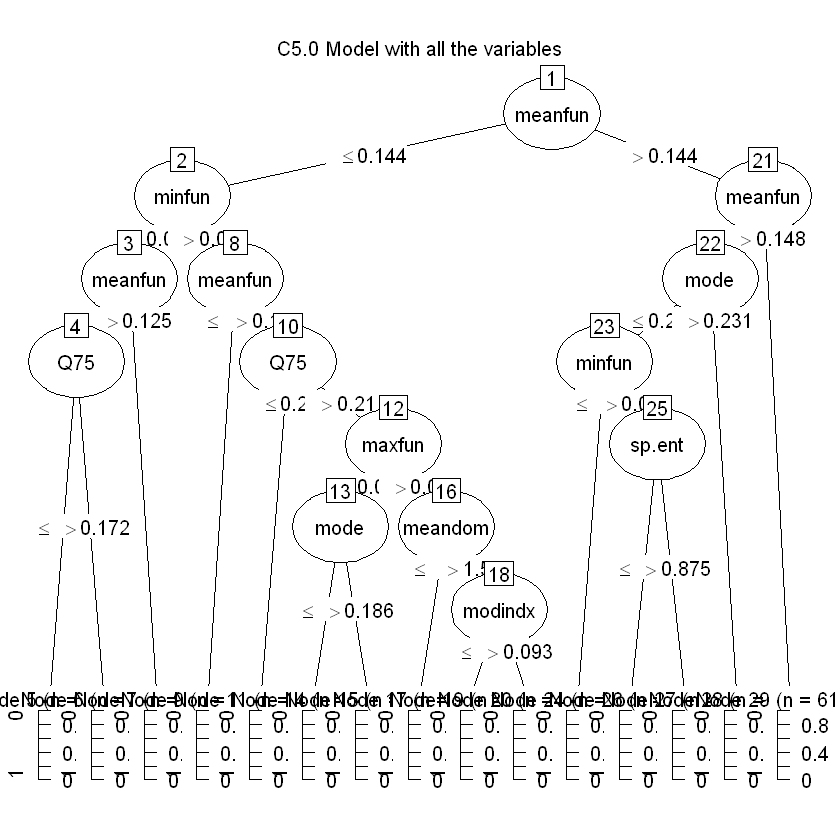

In [19]:
#C50 Modeling
#Model1 with all selected variables
cmodel1 <- C5.0(label ~ . , data=voicedata_train)
summary(cmodel1)
plot(cmodel1,main="C5.0 Model with all the variables")
train_predictions <- predict(cmodel1, voicedata_train)
test_predictions <- predict(cmodel1, voicedata_test)
result_matrix <- classificationResult(voicedata_test$label,voicedata_train$label,test_predictions,train_predictions,"C5.0-All Variables",result_matrix)
result_matrix

Call:
rpart(formula = label ~ ., data = voicedata_train)
  n= 1367 

         CP nsplit  rel error   xerror       xstd
1 0.9197623      0 1.00000000 1.000000 0.02746553
2 0.0100000      1 0.08023774 0.102526 0.01202715

Variable importance
meanfun  sp.ent    kurt meandom    mode  minfun 
     41      22      12      10      10       6 

Node number 1: 1367 observations,    complexity param=0.9197623
  predicted class=0  expected loss=0.4923189  P(node) =1
    class counts:   694   673
   probabilities: 0.508 0.492 
  left son=2 (706 obs) right son=3 (661 obs)
  Primary splits:
      meanfun < 0.1435838  to the left,  improve=579.75800, (0 missing)
      sp.ent  < 0.8659625  to the right, improve=216.31710, (0 missing)
      mode    < 0.1493805  to the left,  improve= 79.44371, (0 missing)
      kurt    < 2.070107   to the left,  improve= 70.83819, (0 missing)
      meandom < 1.235879   to the left,  improve= 47.49000, (0 missing)
  Surrogate splits:
      sp.ent  < 0.8760566  to the ri

,train_accuracy,accuracy,precision,recall,f1
Logit-All Variables,0.9743965,0.9736070,0.9877301,0.9583333,0.9728097
Logit-with strong var,0.9685443,0.9589443,0.9695122,0.9464286,0.9578313
Logit-variable reduction,0.8076079,0.8416422,0.9014085,0.7619048,0.8258065
C5.0-All Variables,0.9882955,0.9589443,0.9638554,0.9523810,0.9580838
CART-ALL,0.9604974,0.9442815,0.9627329,0.9226190,0.9422492


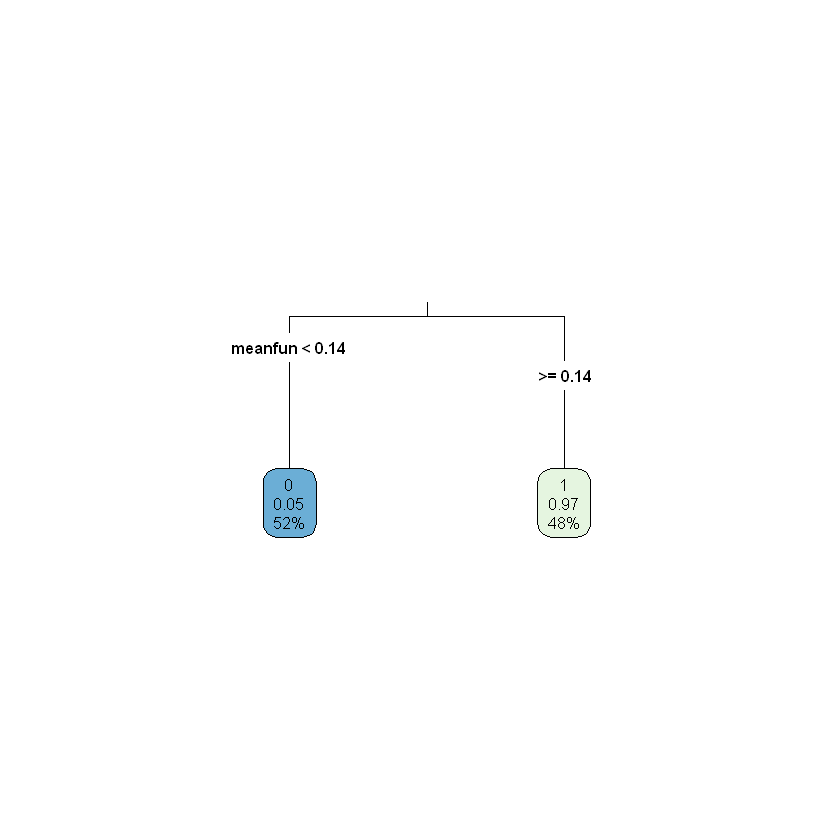

In [20]:
#prediction using cart
#CART -Model 1 with all variables
cart_model1 <- rpart(label ~ ., data = voicedata_train)
summary(cart_model1)
rpart.plot(cart_model1, type=3, tweak=0.8)
train_predictions <- predict(cart_model1, voicedata_train, type="class")
test_predictions <- predict(cart_model1, voicedata_test, type="class")
#prediction matrix
result_matrix <- classificationResult(voicedata_test$label,voicedata_train$label,test_predictions,train_predictions,"CART-ALL",result_matrix)
result_matrix

In [21]:

#random forest-tuning dataset
rf_ranges <- list(ntree = c(500, 1000, 1500, 2000), mtry = 3:8)
rf_tune <- tune(randomForest, label ~ ., data =voicedata_train, ranges = rf_ranges)
rf_tune$best.parameters
summary(rf_tune)
rf_best <- rf_tune$best.model
test_predictions <- predict(rf_best, voicedata_test)
train_predictions <- predict(rf_best, voicedata_train)
confusionMatrix(test_predictions, voicedata_test$label)
#prediction matrix
result_matrix <- classificationResult(voicedata_test$label,voicedata_train$label,test_predictions,train_predictions,"RandomForestTuning-ALL",result_matrix)
result_matrix

,ntree,mtry
23,1500,8



Parameter tuning of 'randomForest':

- sampling method: 10-fold cross validation 

- best parameters:
 ntree mtry
  1500    8

- best performance: 0.02559038 

- Detailed performance results:
   ntree mtry      error dispersion
1    500    3 0.02632031 0.01295043
2   1000    3 0.02705024 0.01376763
3   1500    3 0.02705024 0.01376763
4   2000    3 0.02778016 0.01276082
5    500    4 0.02705024 0.01141703
6   1000    4 0.02778016 0.01365717
7   1500    4 0.02705024 0.01376763
8   2000    4 0.02705024 0.01376763
9    500    5 0.02632031 0.01200142
10  1000    5 0.02632031 0.01248494
11  1500    5 0.02778016 0.01276082
12  2000    5 0.02705024 0.01241081
13   500    6 0.02778016 0.01276082
14  1000    6 0.02778016 0.01276082
15  1500    6 0.02778016 0.01276082
16  2000    6 0.02632031 0.01383450
17   500    7 0.02778016 0.01408396
18  1000    7 0.02705024 0.01419111
19  1500    7 0.02632031 0.01248494
20  2000    7 0.02632031 0.01248494
21   500    8 0.02559575 0.01102257
22  1000    8 0

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 168   9
         1   5 159
                                          
               Accuracy : 0.9589          
                 95% CI : (0.9321, 0.9774)
    No Information Rate : 0.5073          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9178          
                                          
 Mcnemar's Test P-Value : 0.4227          
                                          
            Sensitivity : 0.9711          
            Specificity : 0.9464          
         Pos Pred Value : 0.9492          
         Neg Pred Value : 0.9695          
             Prevalence : 0.5073          
         Detection Rate : 0.4927          
   Detection Prevalence : 0.5191          
      Balanced Accuracy : 0.9588          
                                          
       'Positive' Class : 0               
                              

,train_accuracy,accuracy,precision,recall,f1
Logit-All Variables,0.9743965,0.9736070,0.9877301,0.9583333,0.9728097
Logit-with strong var,0.9685443,0.9589443,0.9695122,0.9464286,0.9578313
Logit-variable reduction,0.8076079,0.8416422,0.9014085,0.7619048,0.8258065
C5.0-All Variables,0.9882955,0.9589443,0.9638554,0.9523810,0.9580838
CART-ALL,0.9604974,0.9442815,0.9627329,0.9226190,0.9422492
RandomForestTuning-ALL,1.0000000,0.9589443,0.9695122,0.9464286,0.9578313


In [22]:

#Neural Net
#Preprocessing dataset
voice_pp <- preProcess(voicedata_train, method = c("center", "scale"))
voice_train_pp <- predict(voice_pp, voicedata_train)
voice_train_df_pp <- cbind(voice_train_pp, label = voicedata_train_labels)
voice_test_pp <- predict(voice_pp, voicedata_test)
table(voice_train_pp$label)
table(voice_test_pp$label)
#we will establish our baseline performance by training a single neural network 
#and measuring its accuracy.
n_model <- nnet(label ~ ., data = voice_train_df_pp, size = 2)
summary(n_model)
n_test_predictions <- predict(n_model, voice_test_pp,type = "class")
n_train_predictions <- predict(n_model, voice_train_pp,type = "class")

result_matrix <- classificationResult(voicedata_test$label,voicedata_train$label,n_test_predictions,n_train_predictions,"Single Neural Network-ALL",result_matrix)
result_matrix


  0   1 
694 673 


  0   1 
173 168 

Warning message in model.matrix.default(Terms, m, contrasts):
"the response appeared on the right-hand side and was dropped"Warning message in model.matrix.default(Terms, m, contrasts):
"problem with term 11 in model.matrix: no columns are assigned"

# weights:  25
initial  value 990.349600 
iter  10 value 182.259118
iter  20 value 130.595879
iter  30 value 124.359176
iter  40 value 120.704462
iter  50 value 115.237907
iter  60 value 108.707154
iter  70 value 100.788963
iter  80 value 97.111398
iter  90 value 96.833667
iter 100 value 95.508721
final  value 95.508721 
stopped after 100 iterations


a 10-2-1 network with 25 weights
options were - entropy fitting 
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
  17.23   -7.49  -11.02  -24.77   -1.79  101.84  -31.96   -3.82    7.02   -3.55 
i10->h1 
  -8.29 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
  14.71   10.81   -4.45    6.98    8.39  -93.22  -18.90    3.76  -17.60  -31.65 
i10->h2 
  17.44 
  b->o  h1->o  h2->o 
 -0.63   6.96  -4.17 

,train_accuracy,accuracy,precision,recall,f1
Logit-All Variables,0.9743965,0.9736070,0.9877301,0.9583333,0.9728097
Logit-with strong var,0.9685443,0.9589443,0.9695122,0.9464286,0.9578313
Logit-variable reduction,0.8076079,0.8416422,0.9014085,0.7619048,0.8258065
C5.0-All Variables,0.9882955,0.9589443,0.9638554,0.9523810,0.9580838
CART-ALL,0.9604974,0.9442815,0.9627329,0.9226190,0.9422492
RandomForestTuning-ALL,1.0000000,0.9589443,0.9695122,0.9464286,0.9578313
Single Neural Network-ALL,0.9802487,0.9648094,0.9698795,0.9583333,0.9640719


In [23]:
#SVM-cross validation
svmCross<- tune(svm, label~ ., data = voicedata_train, kernel = "radial", ranges = list(cost = c(0.01, 0.1, 1, 10, 100),gamma = c(0.01, 0.05, 0.1, 0.5, 1)))
svmCross
#unbaised
svmCross$best.parameters # parameters
svmCross$best.performance # performance
svmCross$best.model
best_model <- svmCross$best.model
train_predictions <- predict(best_model, voicedata_train)
test_predictions <- predict(best_model, voicedata_test)
#prediction matrix
result_matrix <- classificationResult(voicedata_test$label,voicedata_train$label,test_predictions,train_predictions,"SVM-ALL",result_matrix)
result_matrix # append


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1   0.1

- best performance: 0.02485509 


,cost,gamma
13,1,0.1


[1] 0.02485509


Call:
best.tune(method = svm, train.x = label ~ ., data = voicedata_train, 
    ranges = list(cost = c(0.01, 0.1, 1, 10, 100), gamma = c(0.01, 
        0.05, 0.1, 0.5, 1)), kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  253


,train_accuracy,accuracy,precision,recall,f1
Logit-All Variables,0.9743965,0.9736070,0.9877301,0.9583333,0.9728097
Logit-with strong var,0.9685443,0.9589443,0.9695122,0.9464286,0.9578313
Logit-variable reduction,0.8076079,0.8416422,0.9014085,0.7619048,0.8258065
C5.0-All Variables,0.9882955,0.9589443,0.9638554,0.9523810,0.9580838
CART-ALL,0.9604974,0.9442815,0.9627329,0.9226190,0.9422492
RandomForestTuning-ALL,1.0000000,0.9589443,0.9695122,0.9464286,0.9578313
Single Neural Network-ALL,0.9802487,0.9648094,0.9698795,0.9583333,0.9640719
SVM-ALL,0.9846379,0.9912023,0.9940120,0.9880952,0.9910448


Warning message in trControlCheck(x = trControl, y = target):
"x$savePredictions == TRUE is depreciated. Setting to 'final' instead."Warning message in trControlCheck(x = trControl, y = target):
"indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes."Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"'trials' should be <= 8 for this object.


Call:
summary.resamples(object = results)

Models: rpart, glm, knn, svmRadial, C5.0 
Number of resamples: 30 

Accuracy 
               Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
rpart     0.8571429 0.9398396 0.9428571 0.9502682 0.9712185 1.0000000    0
glm       0.8823529 0.9415966 0.9705882 0.9618963 0.9714286 1.0000000    0
knn       0.4571429 0.6571429 0.7312834 0.7108013 0.7697479 0.8529412    0
svmRadial 0.9393939 0.9705882 0.9705882 0.9716442 0.9714286 1.0000000    0
C5.0      0.8823529 0.9415966 0.9705882 0.9609422 0.9928571 1.0000000    0

Kappa 
                 Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
rpart      0.71544715 0.8795956 0.8854334 0.9005591 0.9423318 1.0000000    0
glm        0.76551724 0.8830762 0.9411765 0.9237933 0.9428570 1.0000000    0
knn       -0.09195402 0.3120379 0.4656326 0.4212433 0.5392157 0.7058824    0
svmRadial  0.87867647 0.9411765 0.9411765 0.9432839 0.9429038 1.0000000    0
C5.0       0.76470588 0.8833804 0.9

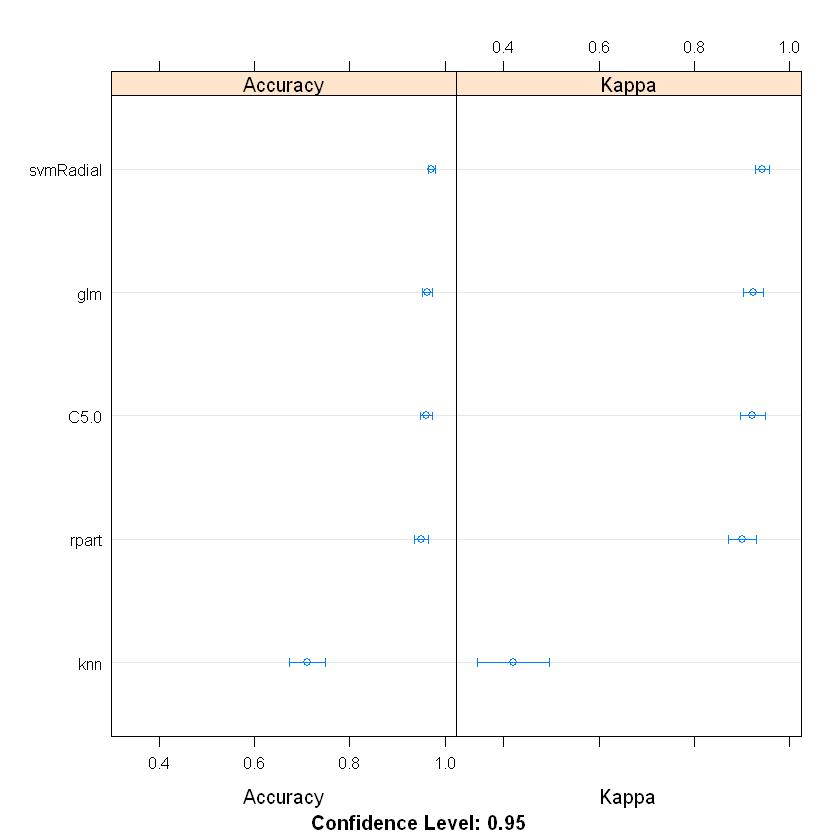

In [24]:
#Stacking
control <- trainControl(method="repeatedcv", number=10, repeats=3, savePredictions=TRUE, classProbs=TRUE)
algorithmList <- c('rpart', 'glm', 'knn','svmRadial','C5.0')
models <- caretList(make.names(label) ~ ., data=voicedata_test, trControl=control, methodList=algorithmList)
results <- resamples(models)
summary(results) # summary of stacking model
dotplot(results) # ploting stacking models

### Model Evaluation 

* Compute and interpret your results in terms of accuracy, precision, recall, ROC etc. 
* Interpretation are shown below


Call:
best.tune(method = svm, train.x = label ~ ., data = voicedata_train, 
    ranges = list(cost = c(0.01, 0.1, 1, 10, 100), gamma = c(0.01, 
        0.05, 0.1, 0.5, 1)), kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  253


Setting levels: control = 1, case = 2
Setting direction: controls < cases
Setting levels: control = 1, case = 2
Setting direction: controls < cases


[1] "ROC area under curve for test data"


Area under the curve: 0.9912

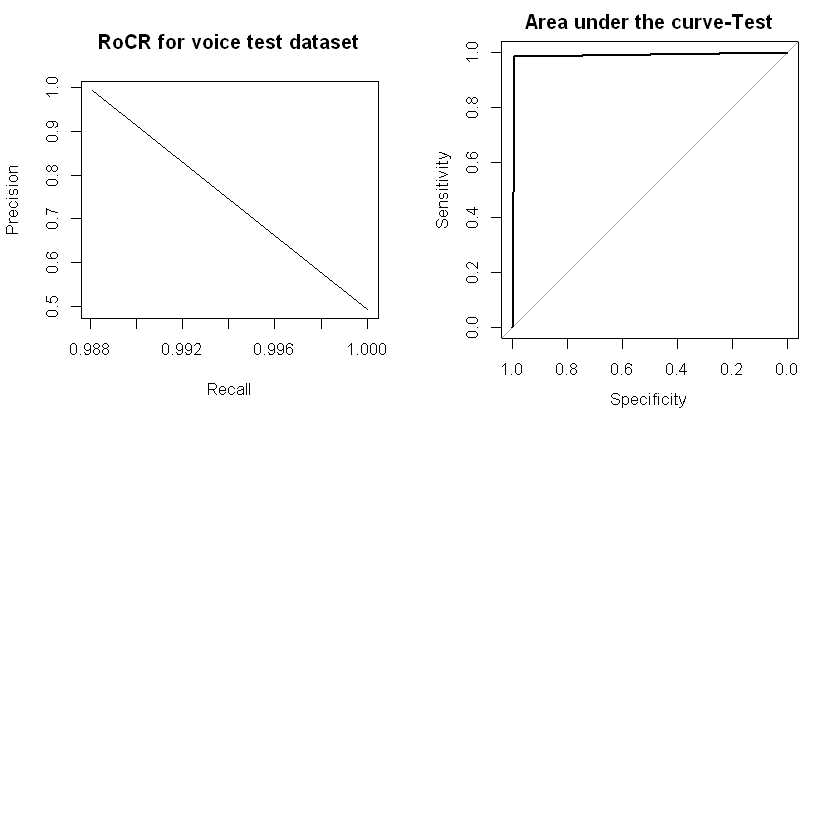

In [25]:
par(mfrow=c(2,2))

#for test dataset
best_model
test_predictions <- predict(best_model, newdata = voicedata_test,type = "class")#predict model
pred <- prediction(as.numeric(test_predictions), as.numeric(voicedata_test$label)) #compare actual n prediction
perf <- performance(pred, measure = "prec", x.measure = "rec")#evaluate performance
plot(perf,main="RoCR for voice test dataset")#plot graph
#AUC curve
roc_test<- roc( as.numeric(voicedata_test$label), as.numeric(test_predictions))
test_auc <- auc(as.numeric(voicedata_test$label), as.numeric(test_predictions))
print("ROC area under curve for test data")
test_auc
plot(roc_test,main="Area under the curve-Test")

* What do we infer from the above ROCR and AUC graphs
After looking at all the accuracy, true positive and false positive values.
* Tuned Support vector machine 10 fold cross validation gives better result.
* AUC curve is more aligned to top left corner. This indicated better performance.

### Issues / Improvements
1. Dataset is very small
2. Used Random Forest classifier as ensemble method, got 100% accuracy for training dataset, might have done cross validation to improve results and verified
3. Check Deep learning algorithms as mentioned in AutoML tool, which suggested lazyload

###  References
   - Course material
   - https://www.kaggle.com/primaryobjects/voicegender
http://www.primaryobjects.com/2016/06/22/identifying-the-gender-of-a-voice-using-machine-learning/
	

### Credits

- We have used most of the code that is given in reference to the course.
- Credit to people who converted sound waves to numeric values using acoustic properties

> *This code is based on .... (if any)*

# End of Project